In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


df = pd.read_csv('./../data/curated/engineered-data.csv')

In [2]:
# file from victorian government website
gdf = gpd.read_file('./../data/raw/gda94_victoriagrid/esrishape/whole_of_dataset/victoria/VMADMIN/POSTCODE_POLYGON.shp')

In [3]:
gdf['postcode'] = gdf['POSTCODE'].astype(int)
gdf = gdf.drop('POSTCODE', axis=1)

df['postcode'] = df['postcode'].astype(int)

In [4]:
postcodeFreq = pd.DataFrame(df.groupby('postcode').mean())

In [5]:
postcodeFreq['zlogCrimerate']

postcode
3000    2.282536
3002    1.038875
3003    1.041145
3004    1.628681
3006    1.581340
          ...   
3765    0.415535
3767   -0.187339
3781    0.106394
3782    0.245658
3788   -0.240281
Name: zlogCrimerate, Length: 182, dtype: float64

In [6]:
gdf = gdf.merge(postcodeFreq, on='postcode')

In [7]:
gdf.head()

PFI      PFI_CR        UFI      UFI_CR    UFI_OLD  \
0  205410082  2005-09-27  468438225  2013-10-24  276949831   
1  205410234  2005-09-27  605058974  2021-02-23  576885034   
2  205409916  2005-09-27  559407772  2018-09-06  526596950   
3  205408458  2005-09-27  559407781  2018-09-06  553222661   
4  205409999  2005-09-27  468438318  2013-10-24  276949748   

                                            geometry  postcode       price  \
0  POLYGON ((2516619.521 2407776.903, 2516647.746...      3131  496.304348   
1  POLYGON ((2502460.400 2404045.989, 2502464.885...      3144  613.684211   
2  POLYGON ((2482698.987 2414835.543, 2482698.016...      3023  423.062500   
3  MULTIPOLYGON (((2451881.655 2403637.673, 24518...      3030  428.439716   
4  POLYGON ((2508540.711 2395184.722, 2508429.465...      3167  507.631579   

    studies  closest_primary_distance  ...  cbd_duration  zlogCrimerate  \
0  0.000000               1150.434783  ...   1644.682609       1.025035   
1  0.000000                973.015789  ...   1062.131579       0.762498   
2  0.020833               1270.468750  ...   1884.844792       1.662226   
3  0.063830               2075.416312  ...   2010.839007       1.910250   
4  0.000000               1013.763158  ...   1713.289474       0.647010   

   closest_bus_distance  closest_park_distance  min_pri_icsea  min_sec_icsea  \
0            446.143478            4727.769565    1117.347826    1059.391304   
1            870.363158            6250.163158    1158.368421    1015.315789   
2            636.882292            3412.582292    1009.291667     983.593750   
3            718.225177            5635.255674    1030.549645     984.563025   
4            488.642105            4441.368421    1027.736842    1033.000000   

   log_closest_park_distance  log_closest_tram_distance  \
0                   8.445963                   8.189042   
1                   8.732222                   5.258523   
2                   8.033558                   9.583308   
3                   8.419407                  10.170825   
4                   8.367110                   8.774000   

   log_closest_train_distance  city  
0                    7.466509   0.0  
1                    6.772135   0.0  
2                    8.688992   0.0  
3                    8.418472   0.0  
4                    7.162370   0.0  

[5 rows x 24 columns]

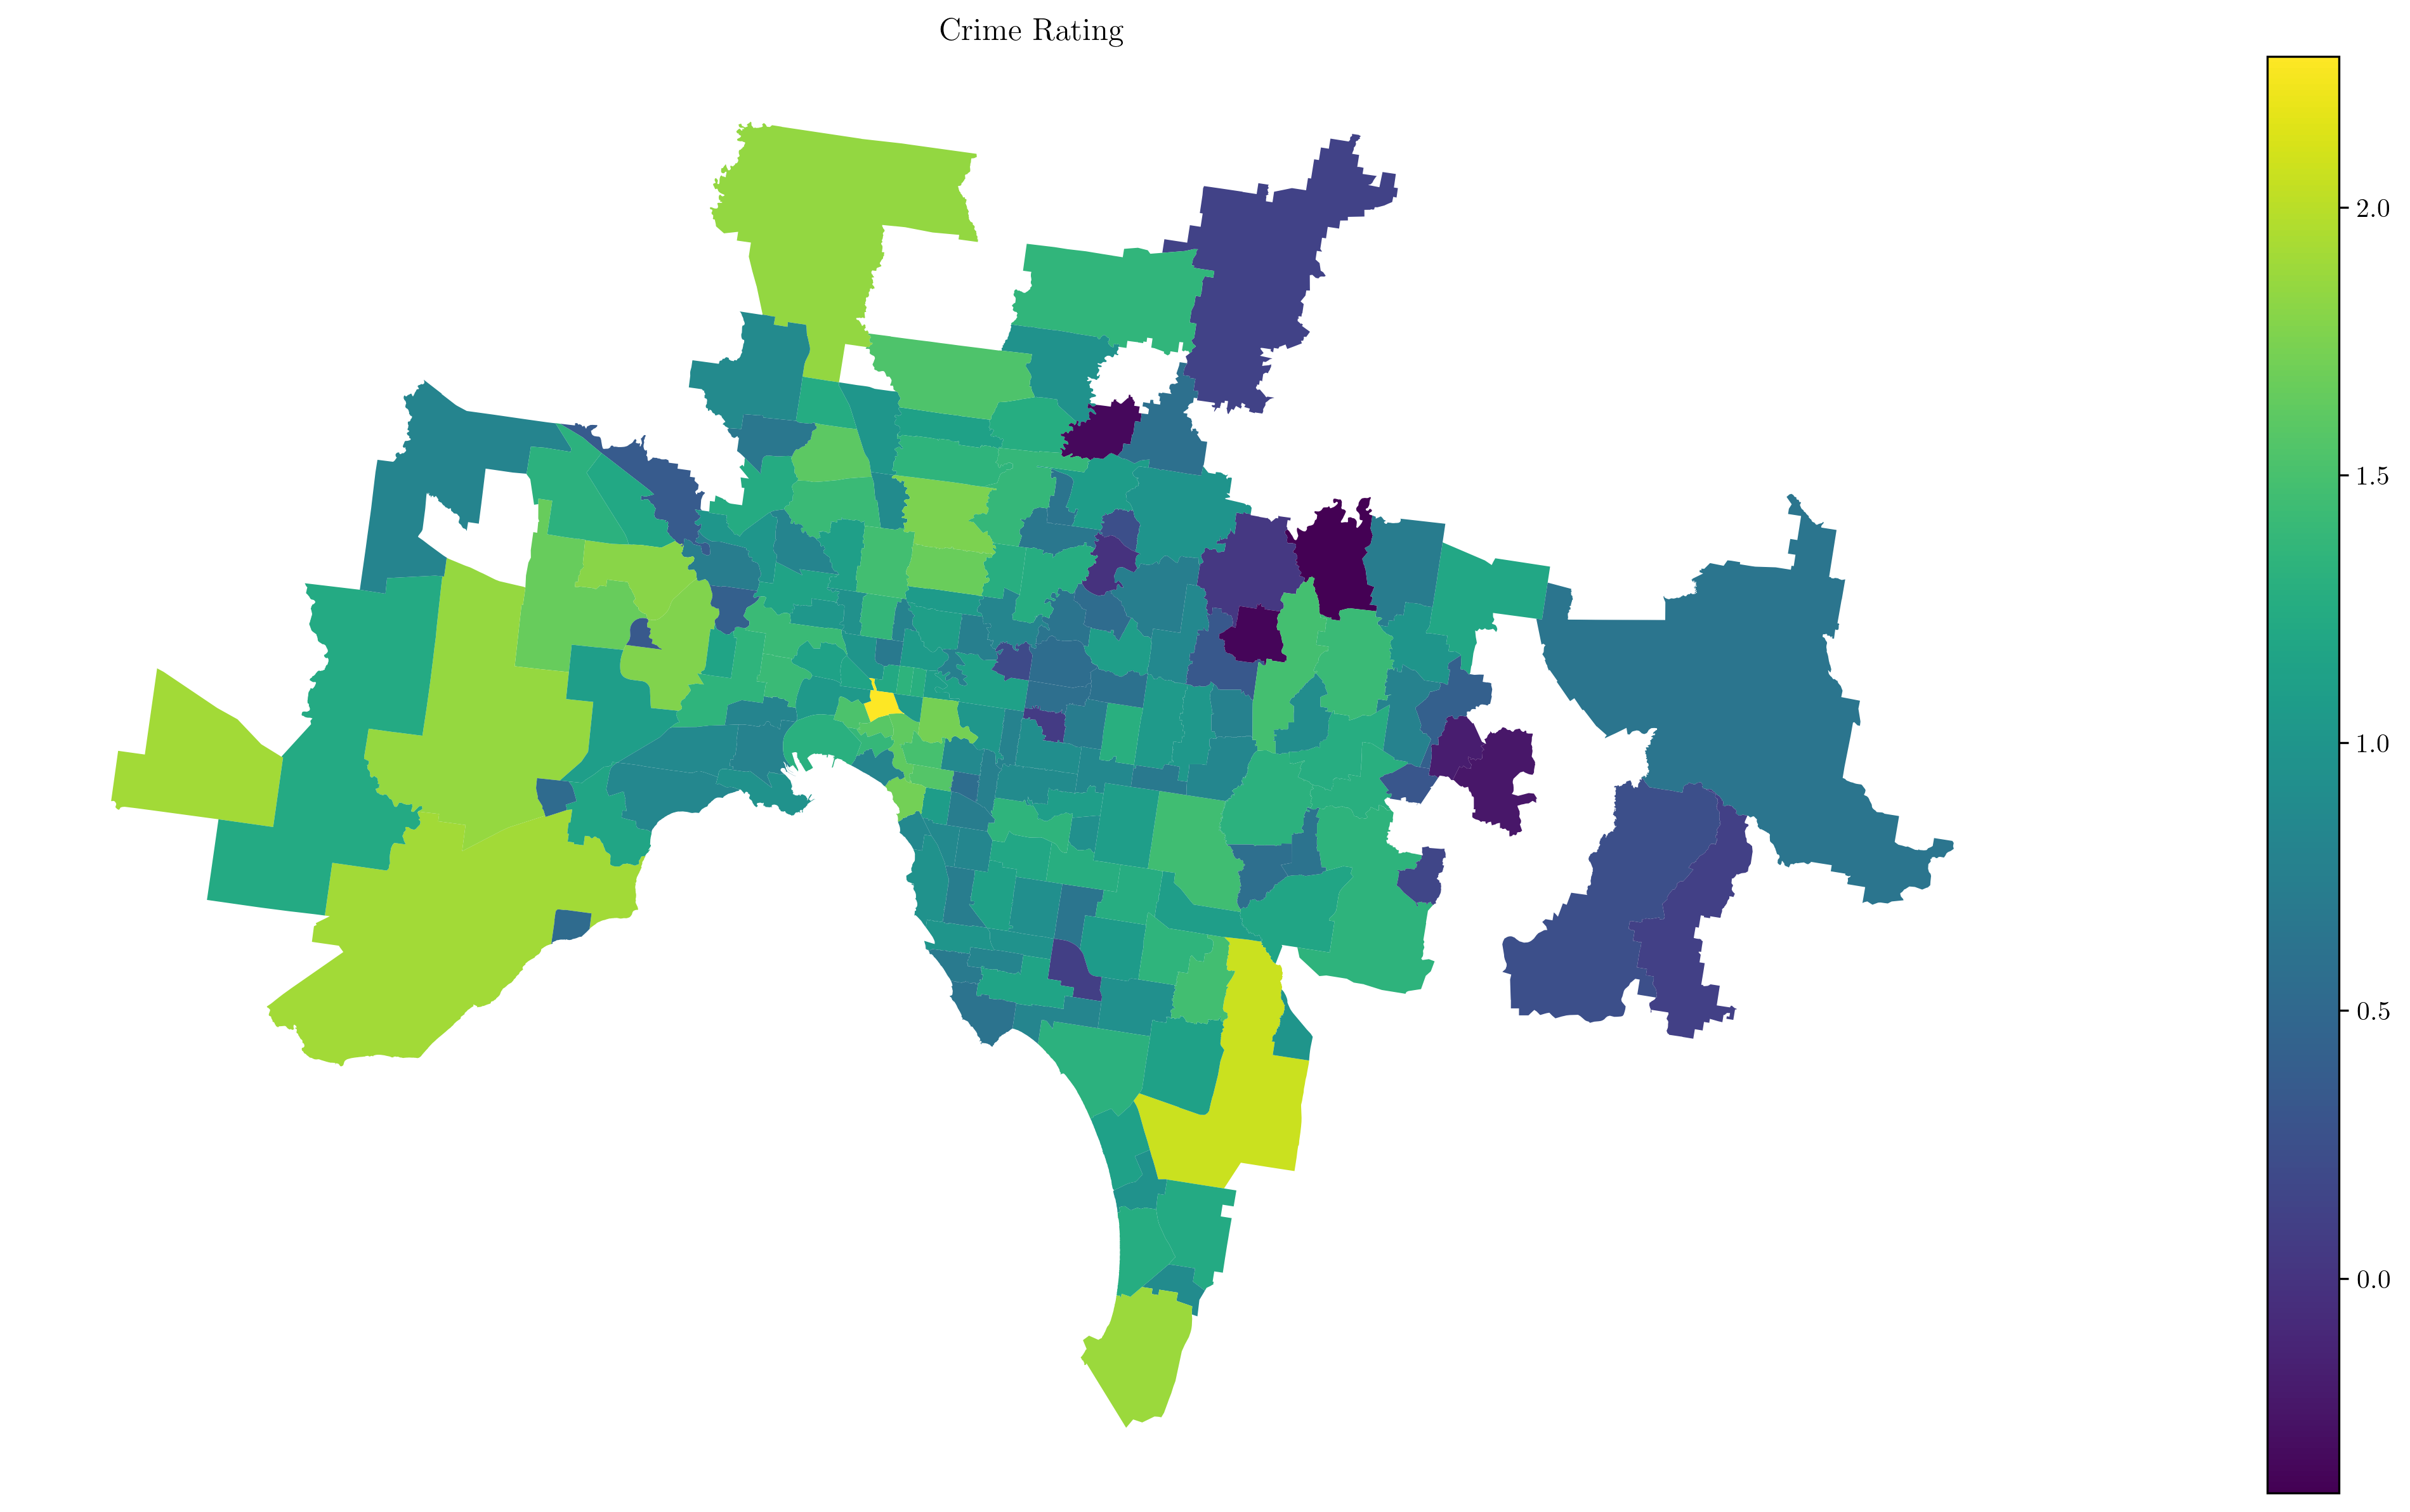

In [8]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("zlogCrimerate", legend=True, ax=ax)
plt.title('Crime Rating')
ax.set_axis_off()

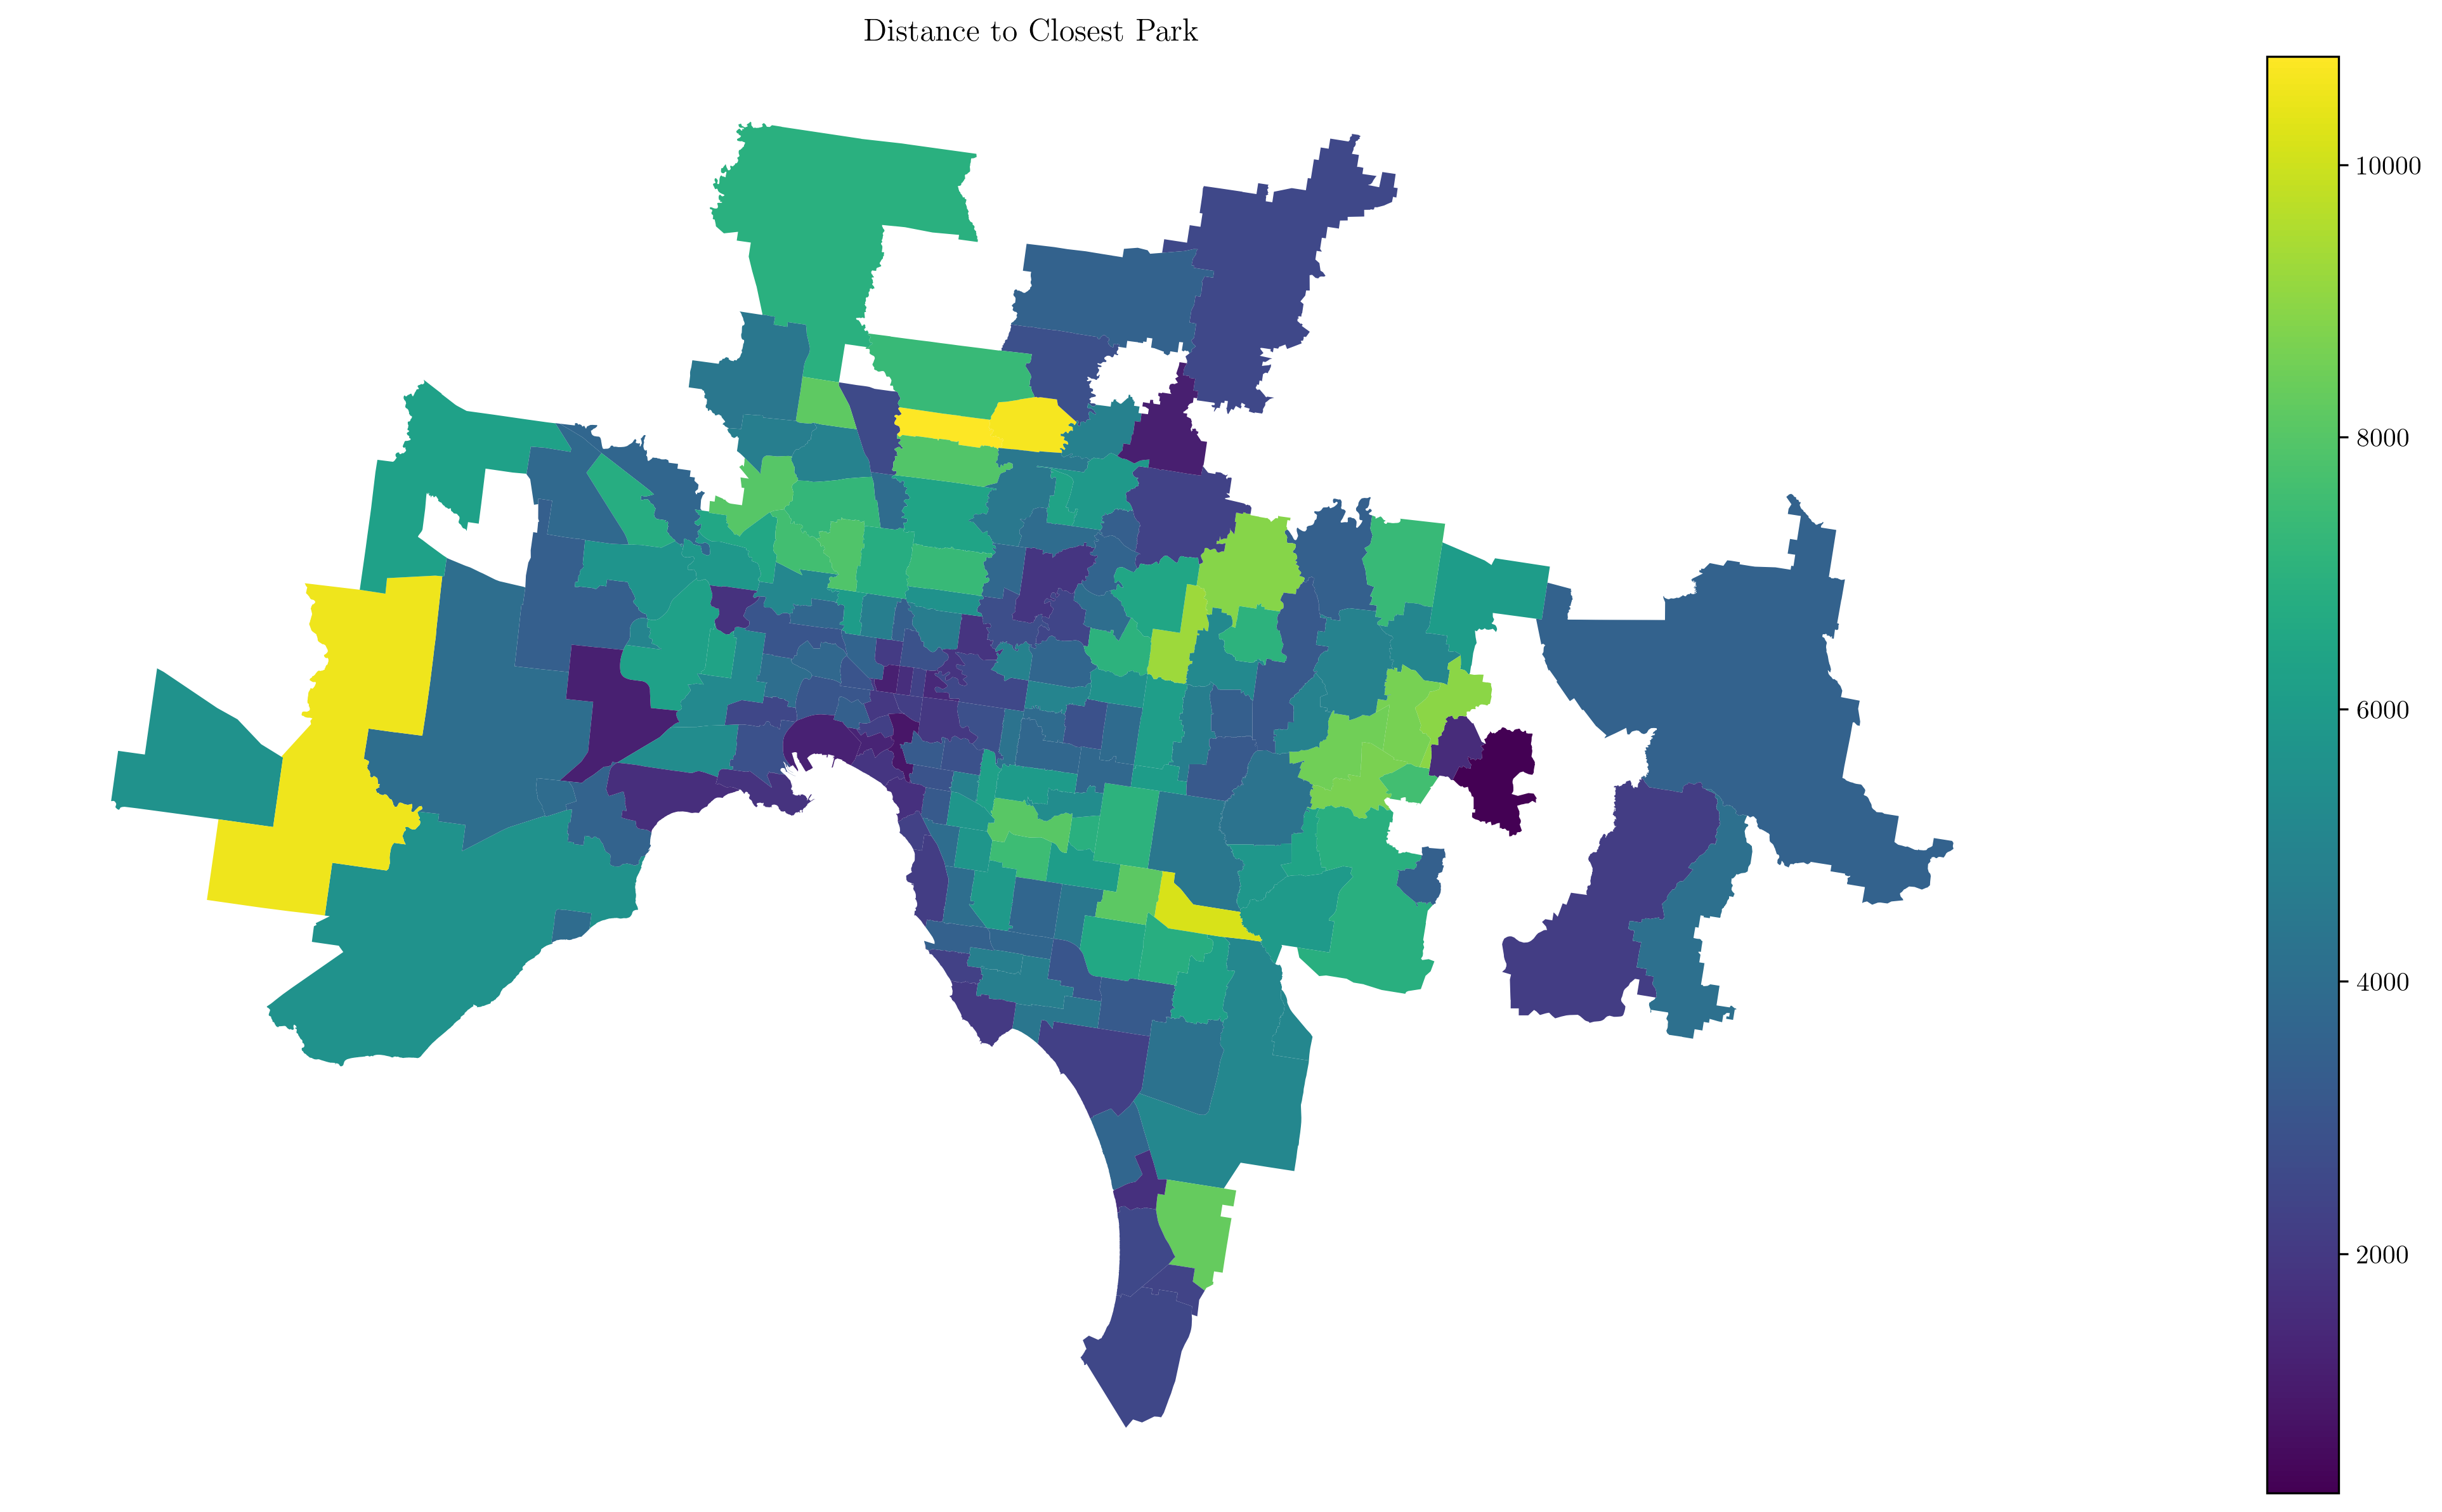

In [9]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("closest_park_distance", legend=True, ax=ax)
plt.title('Distance to Closest Park')
ax.set_axis_off()

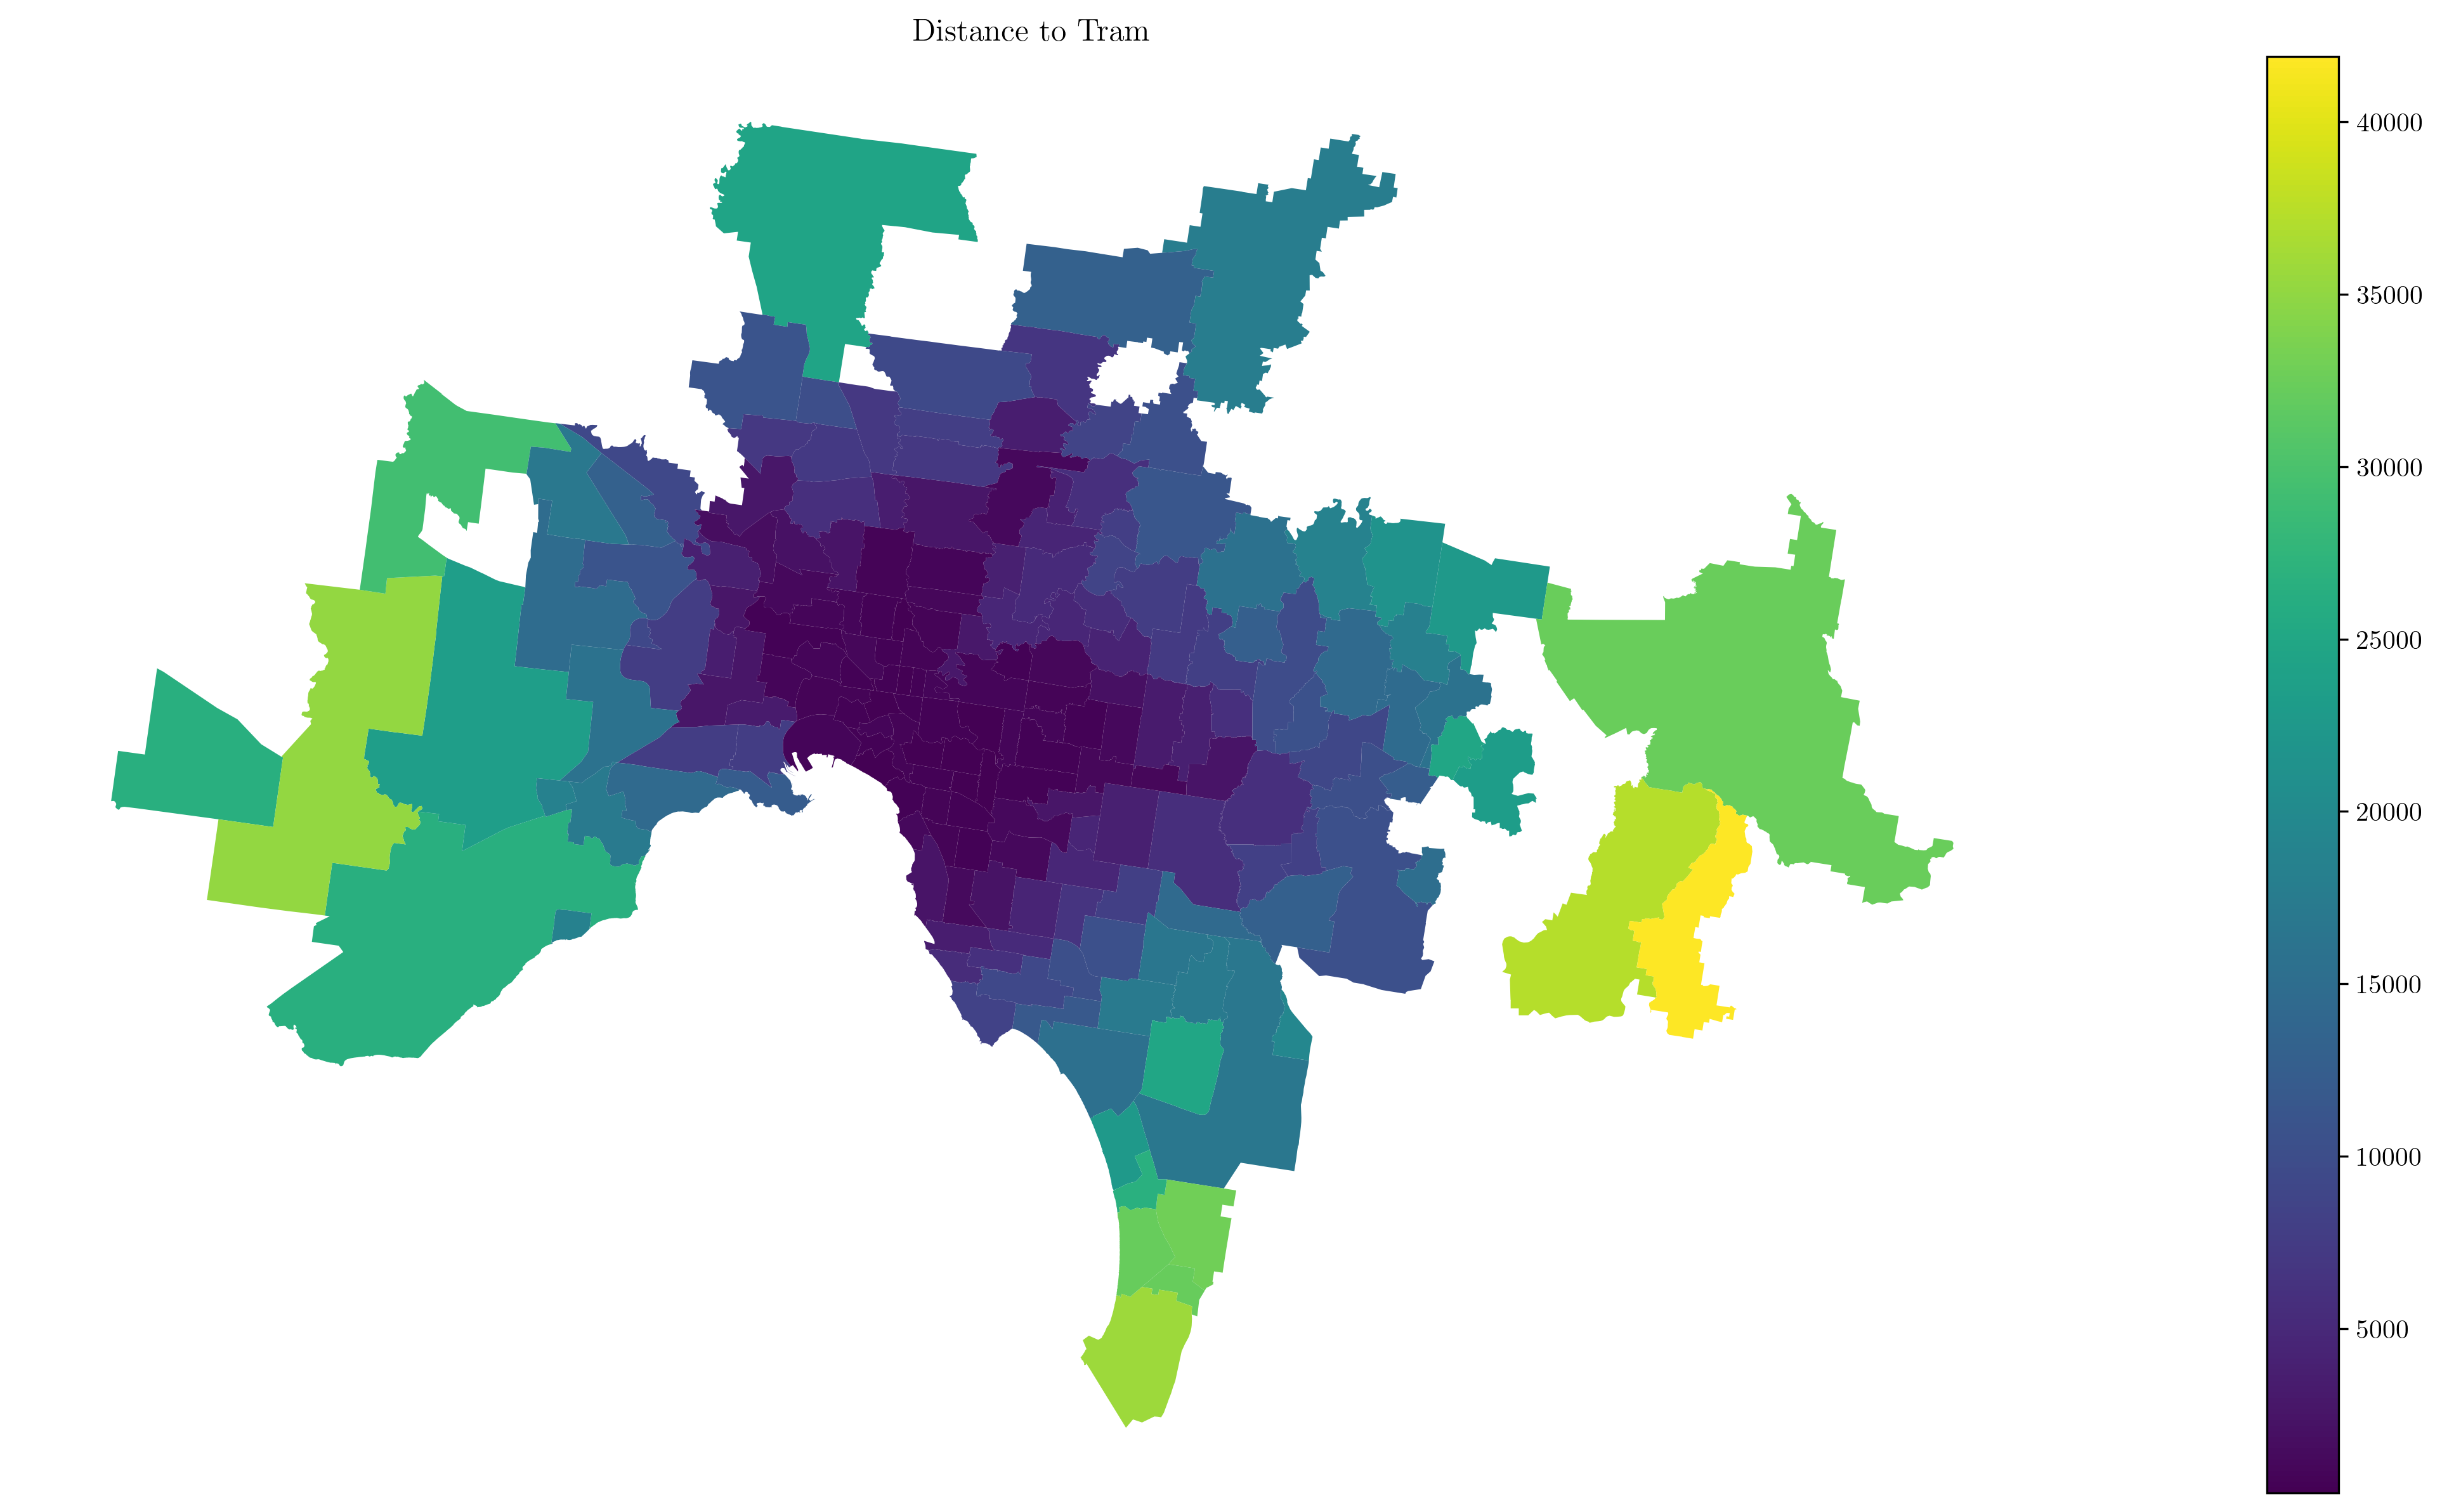

In [10]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("closest_tram_distance", legend=True, ax=ax)
plt.title('Distance to Tram')
ax.set_axis_off()

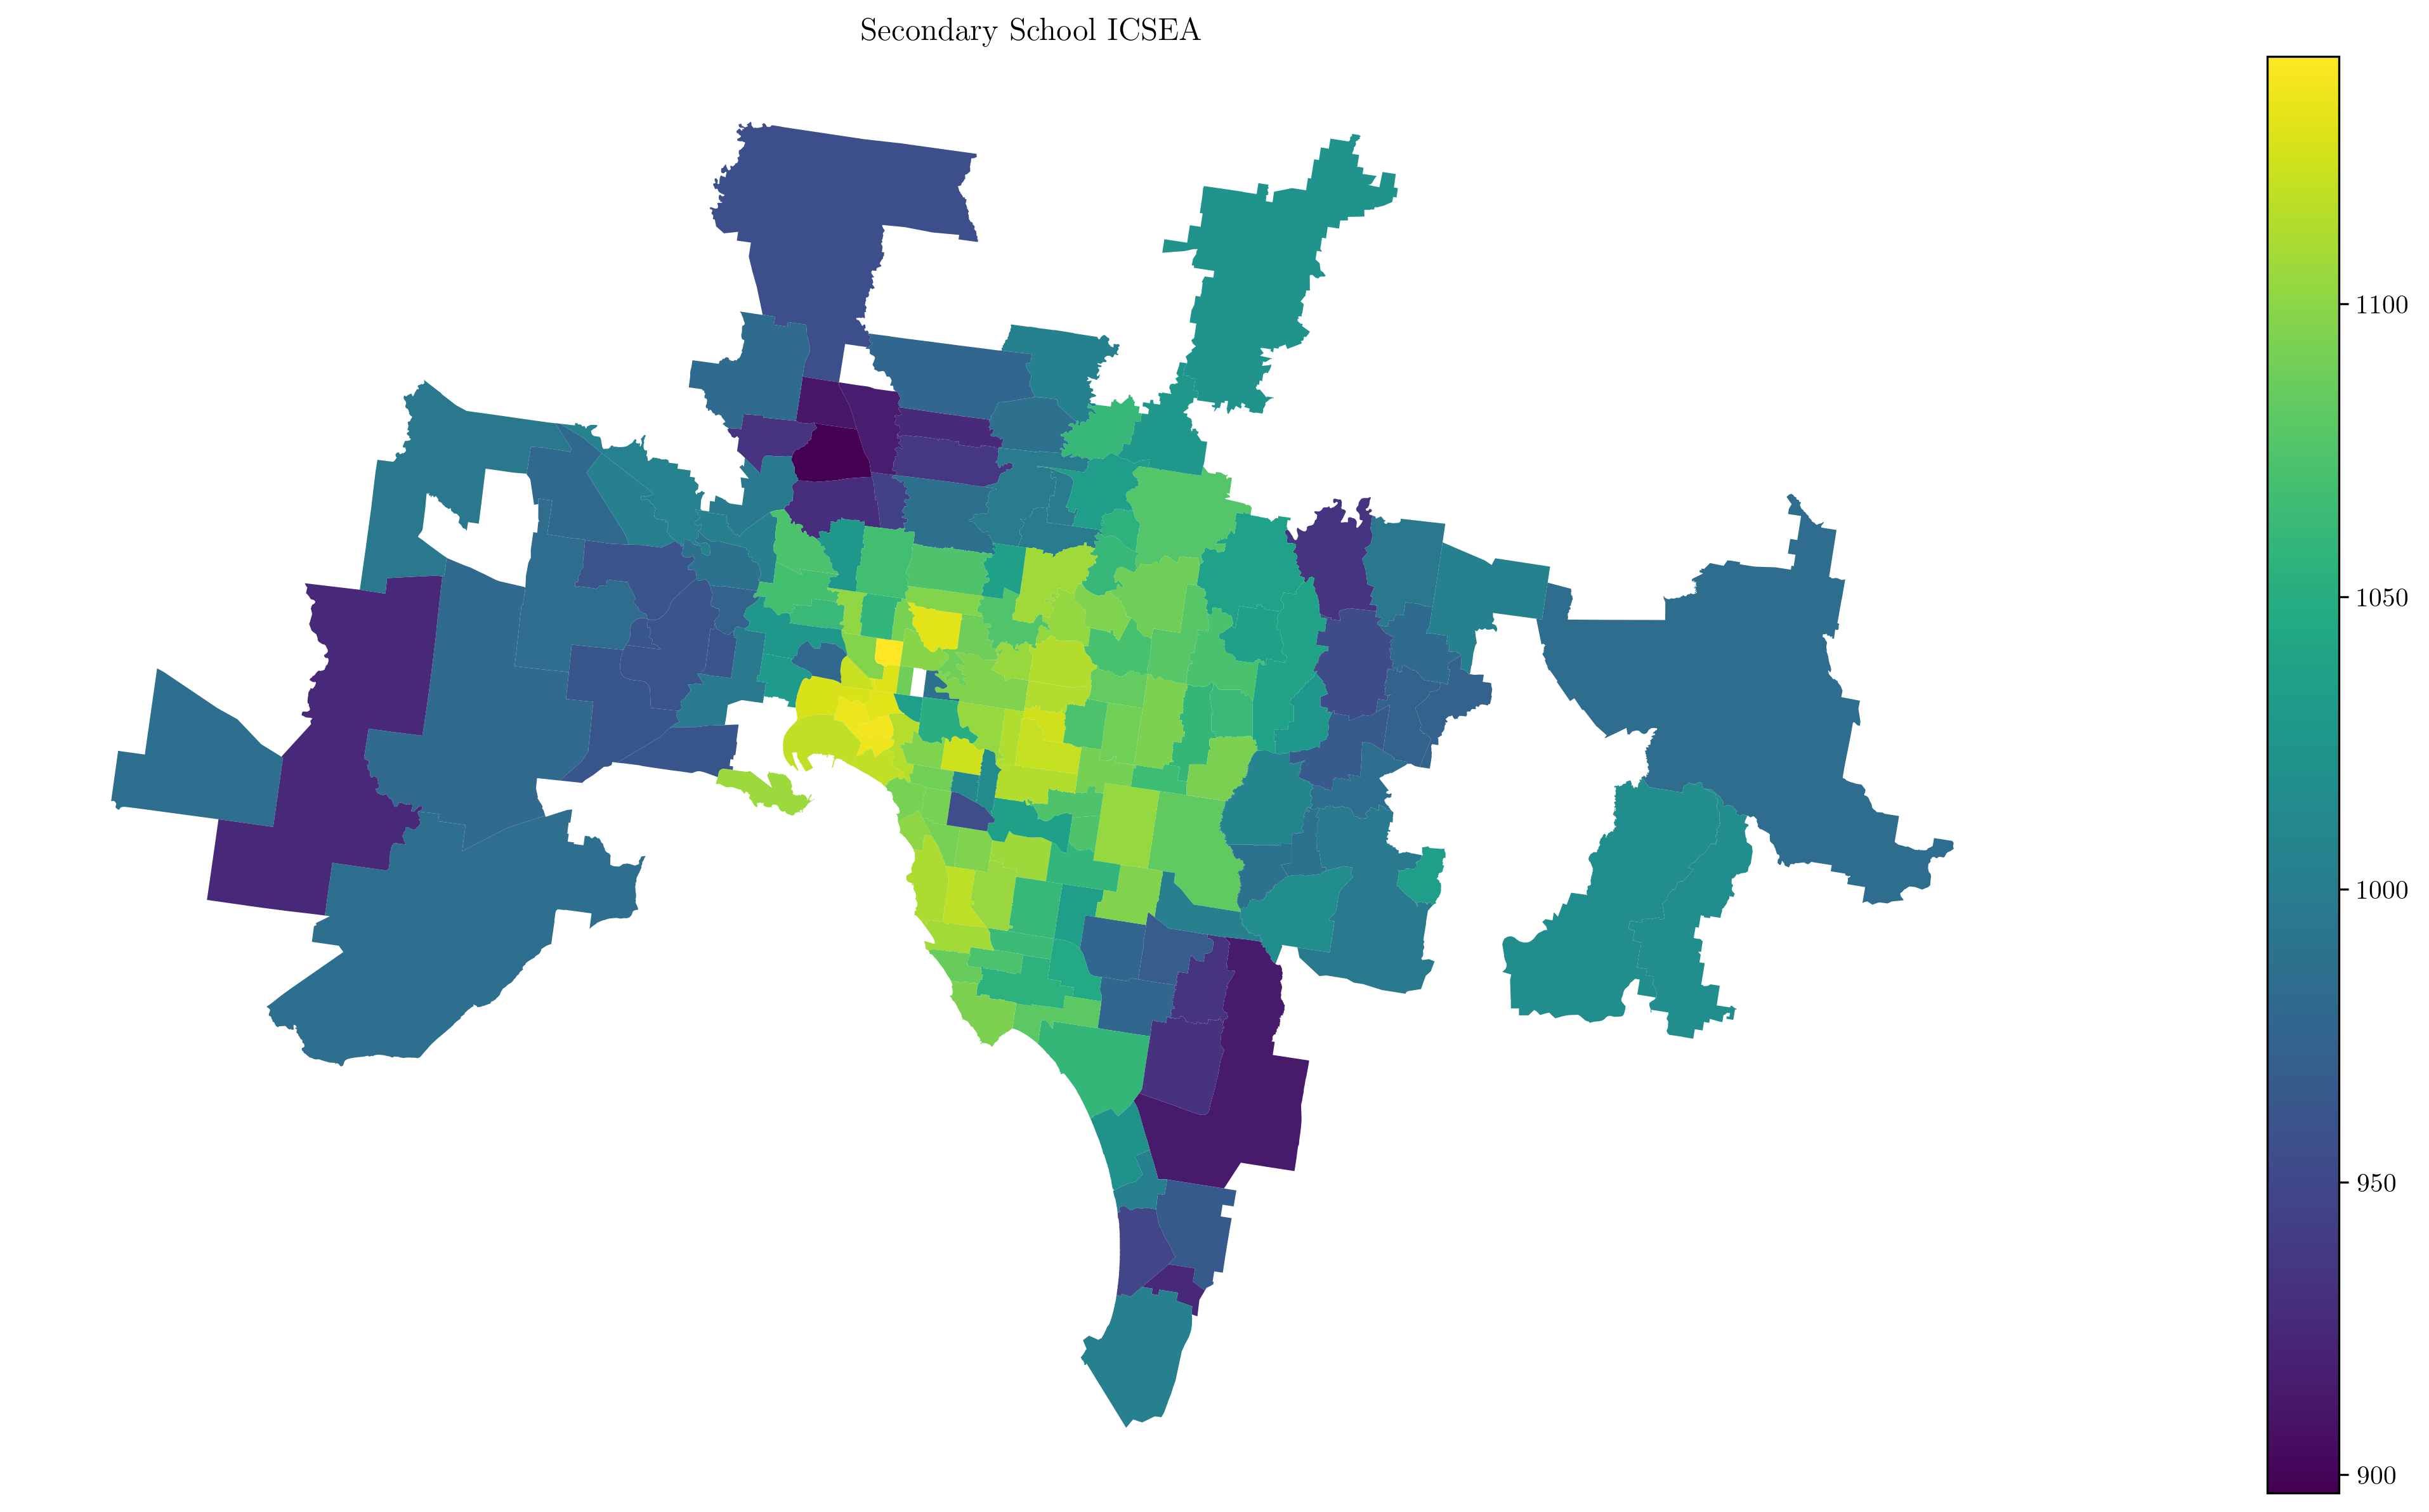

In [11]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("min_sec_icsea", legend=True, ax=ax)
plt.title('Secondary School ICSEA')
ax.set_axis_off()

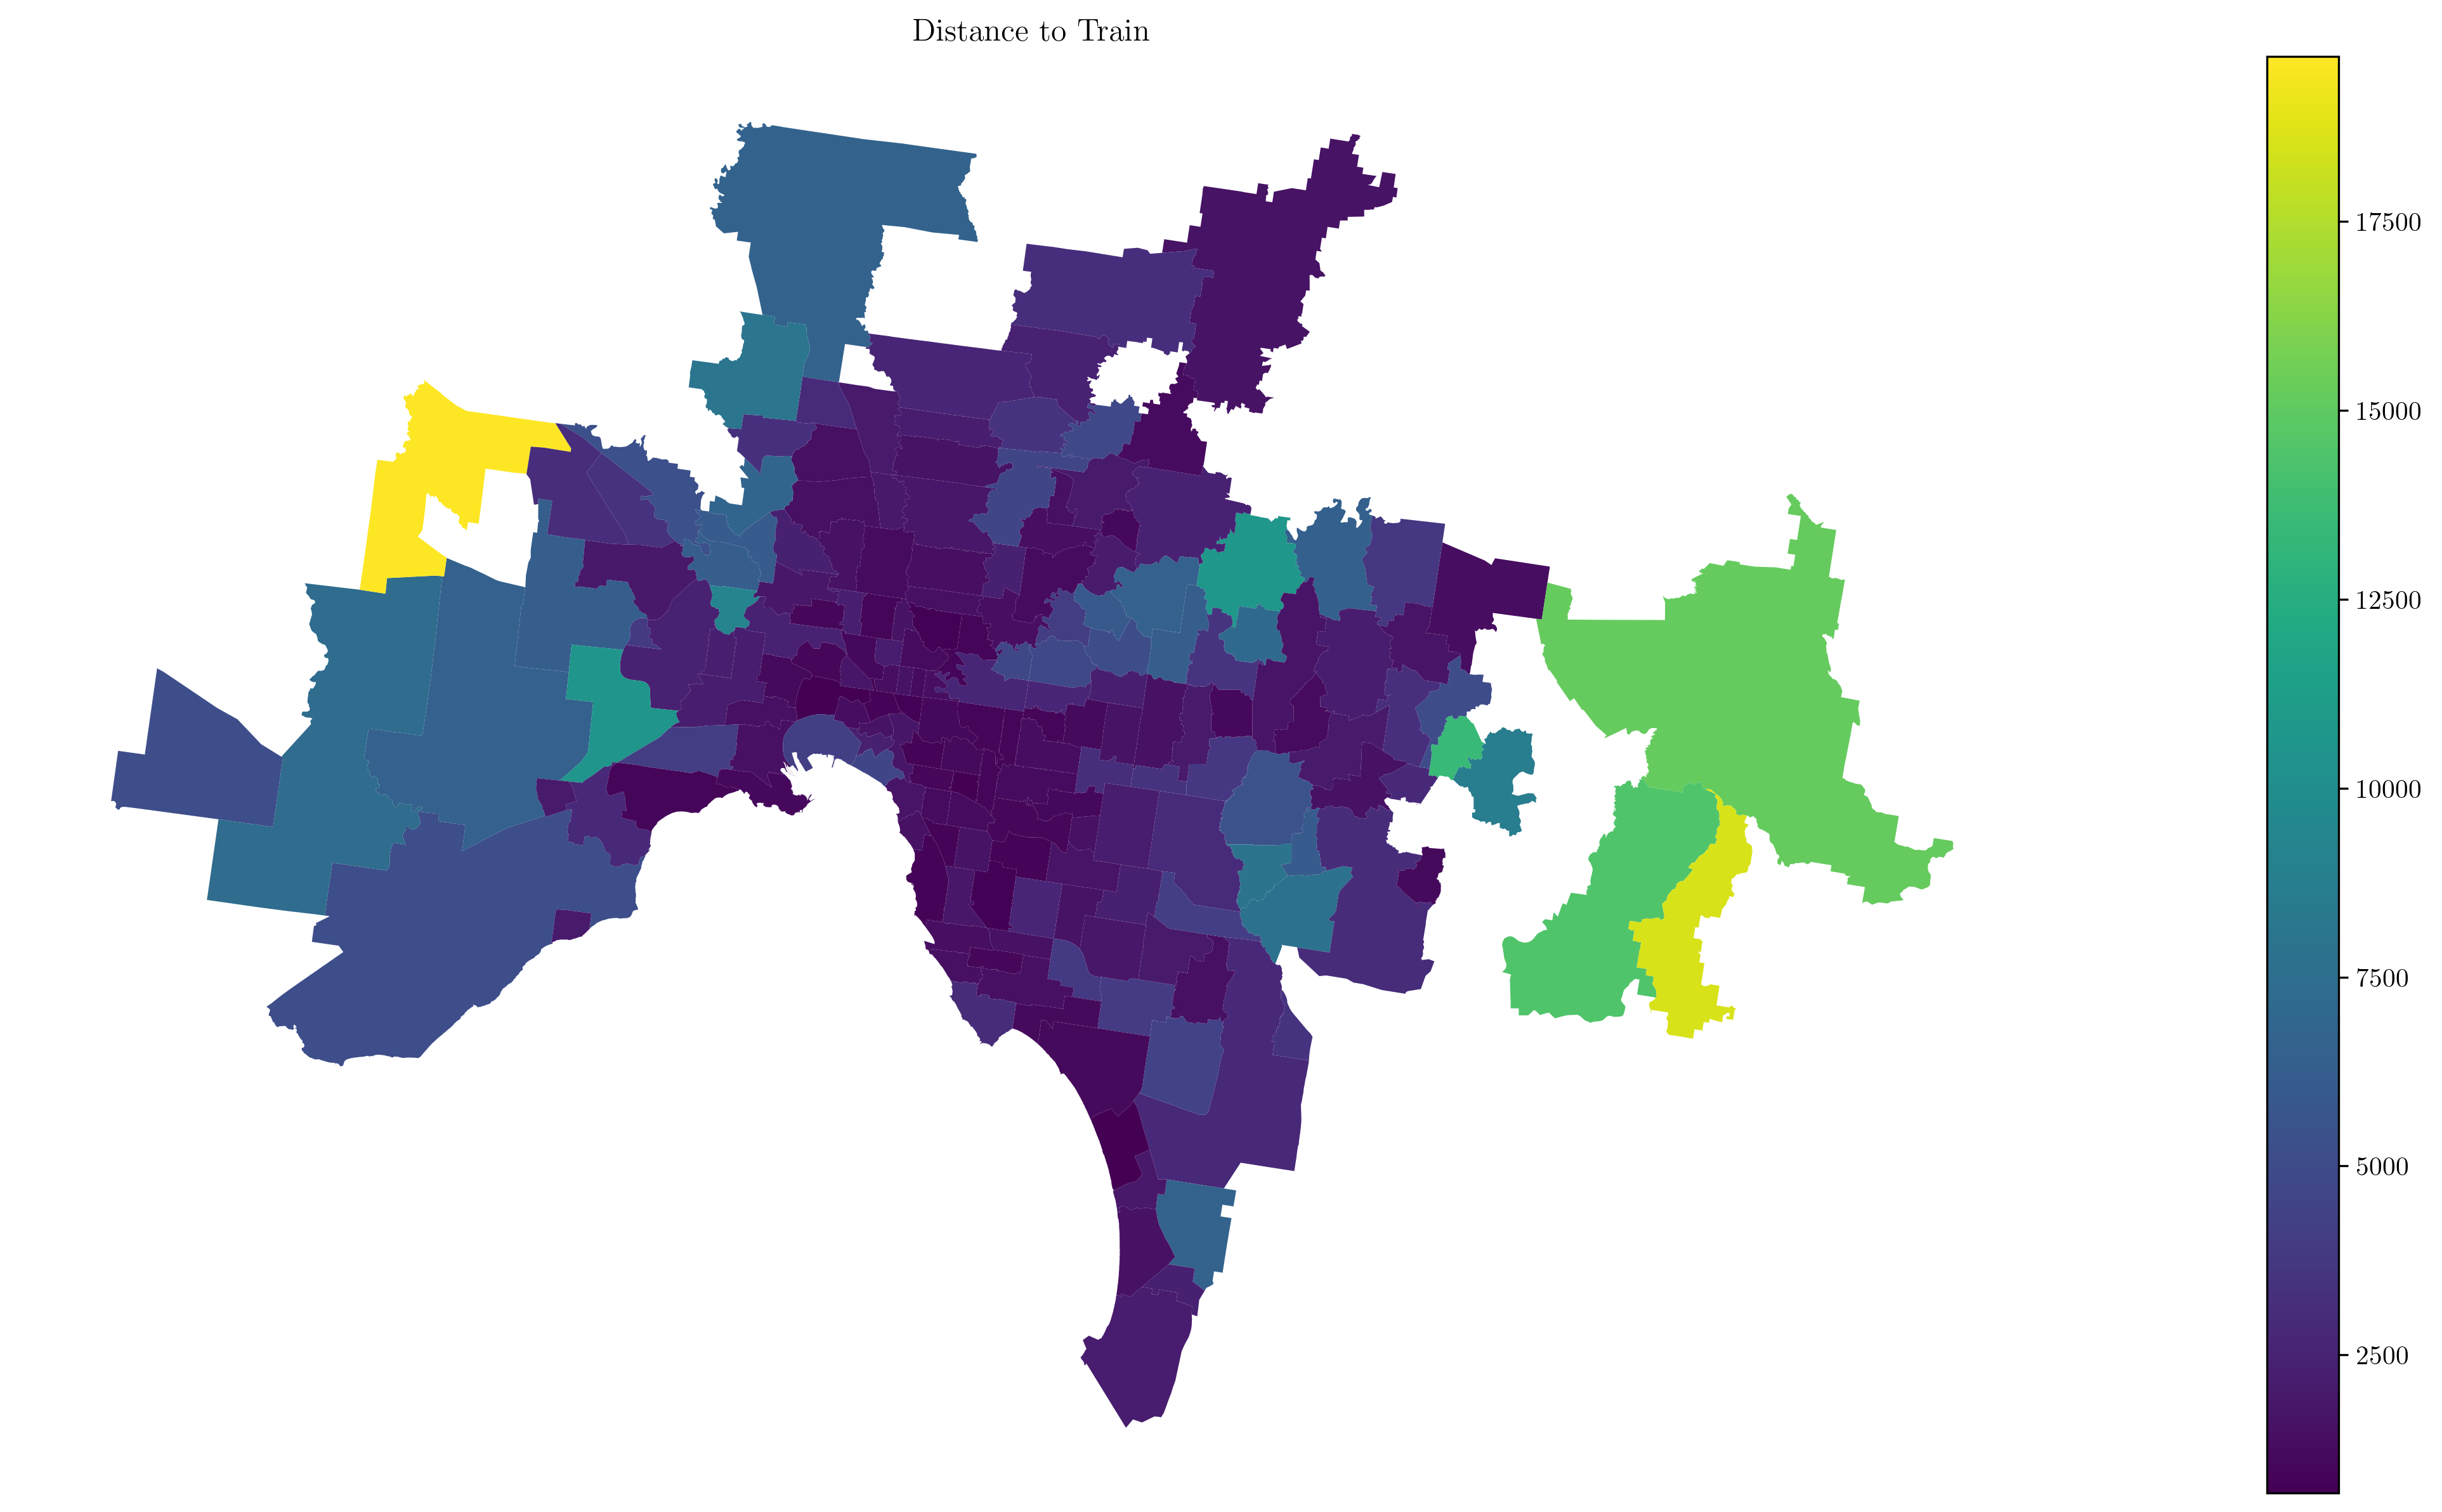

In [12]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("closest_train_distance", legend=True, ax=ax)
plt.title('Distance to Train')
ax.set_axis_off()

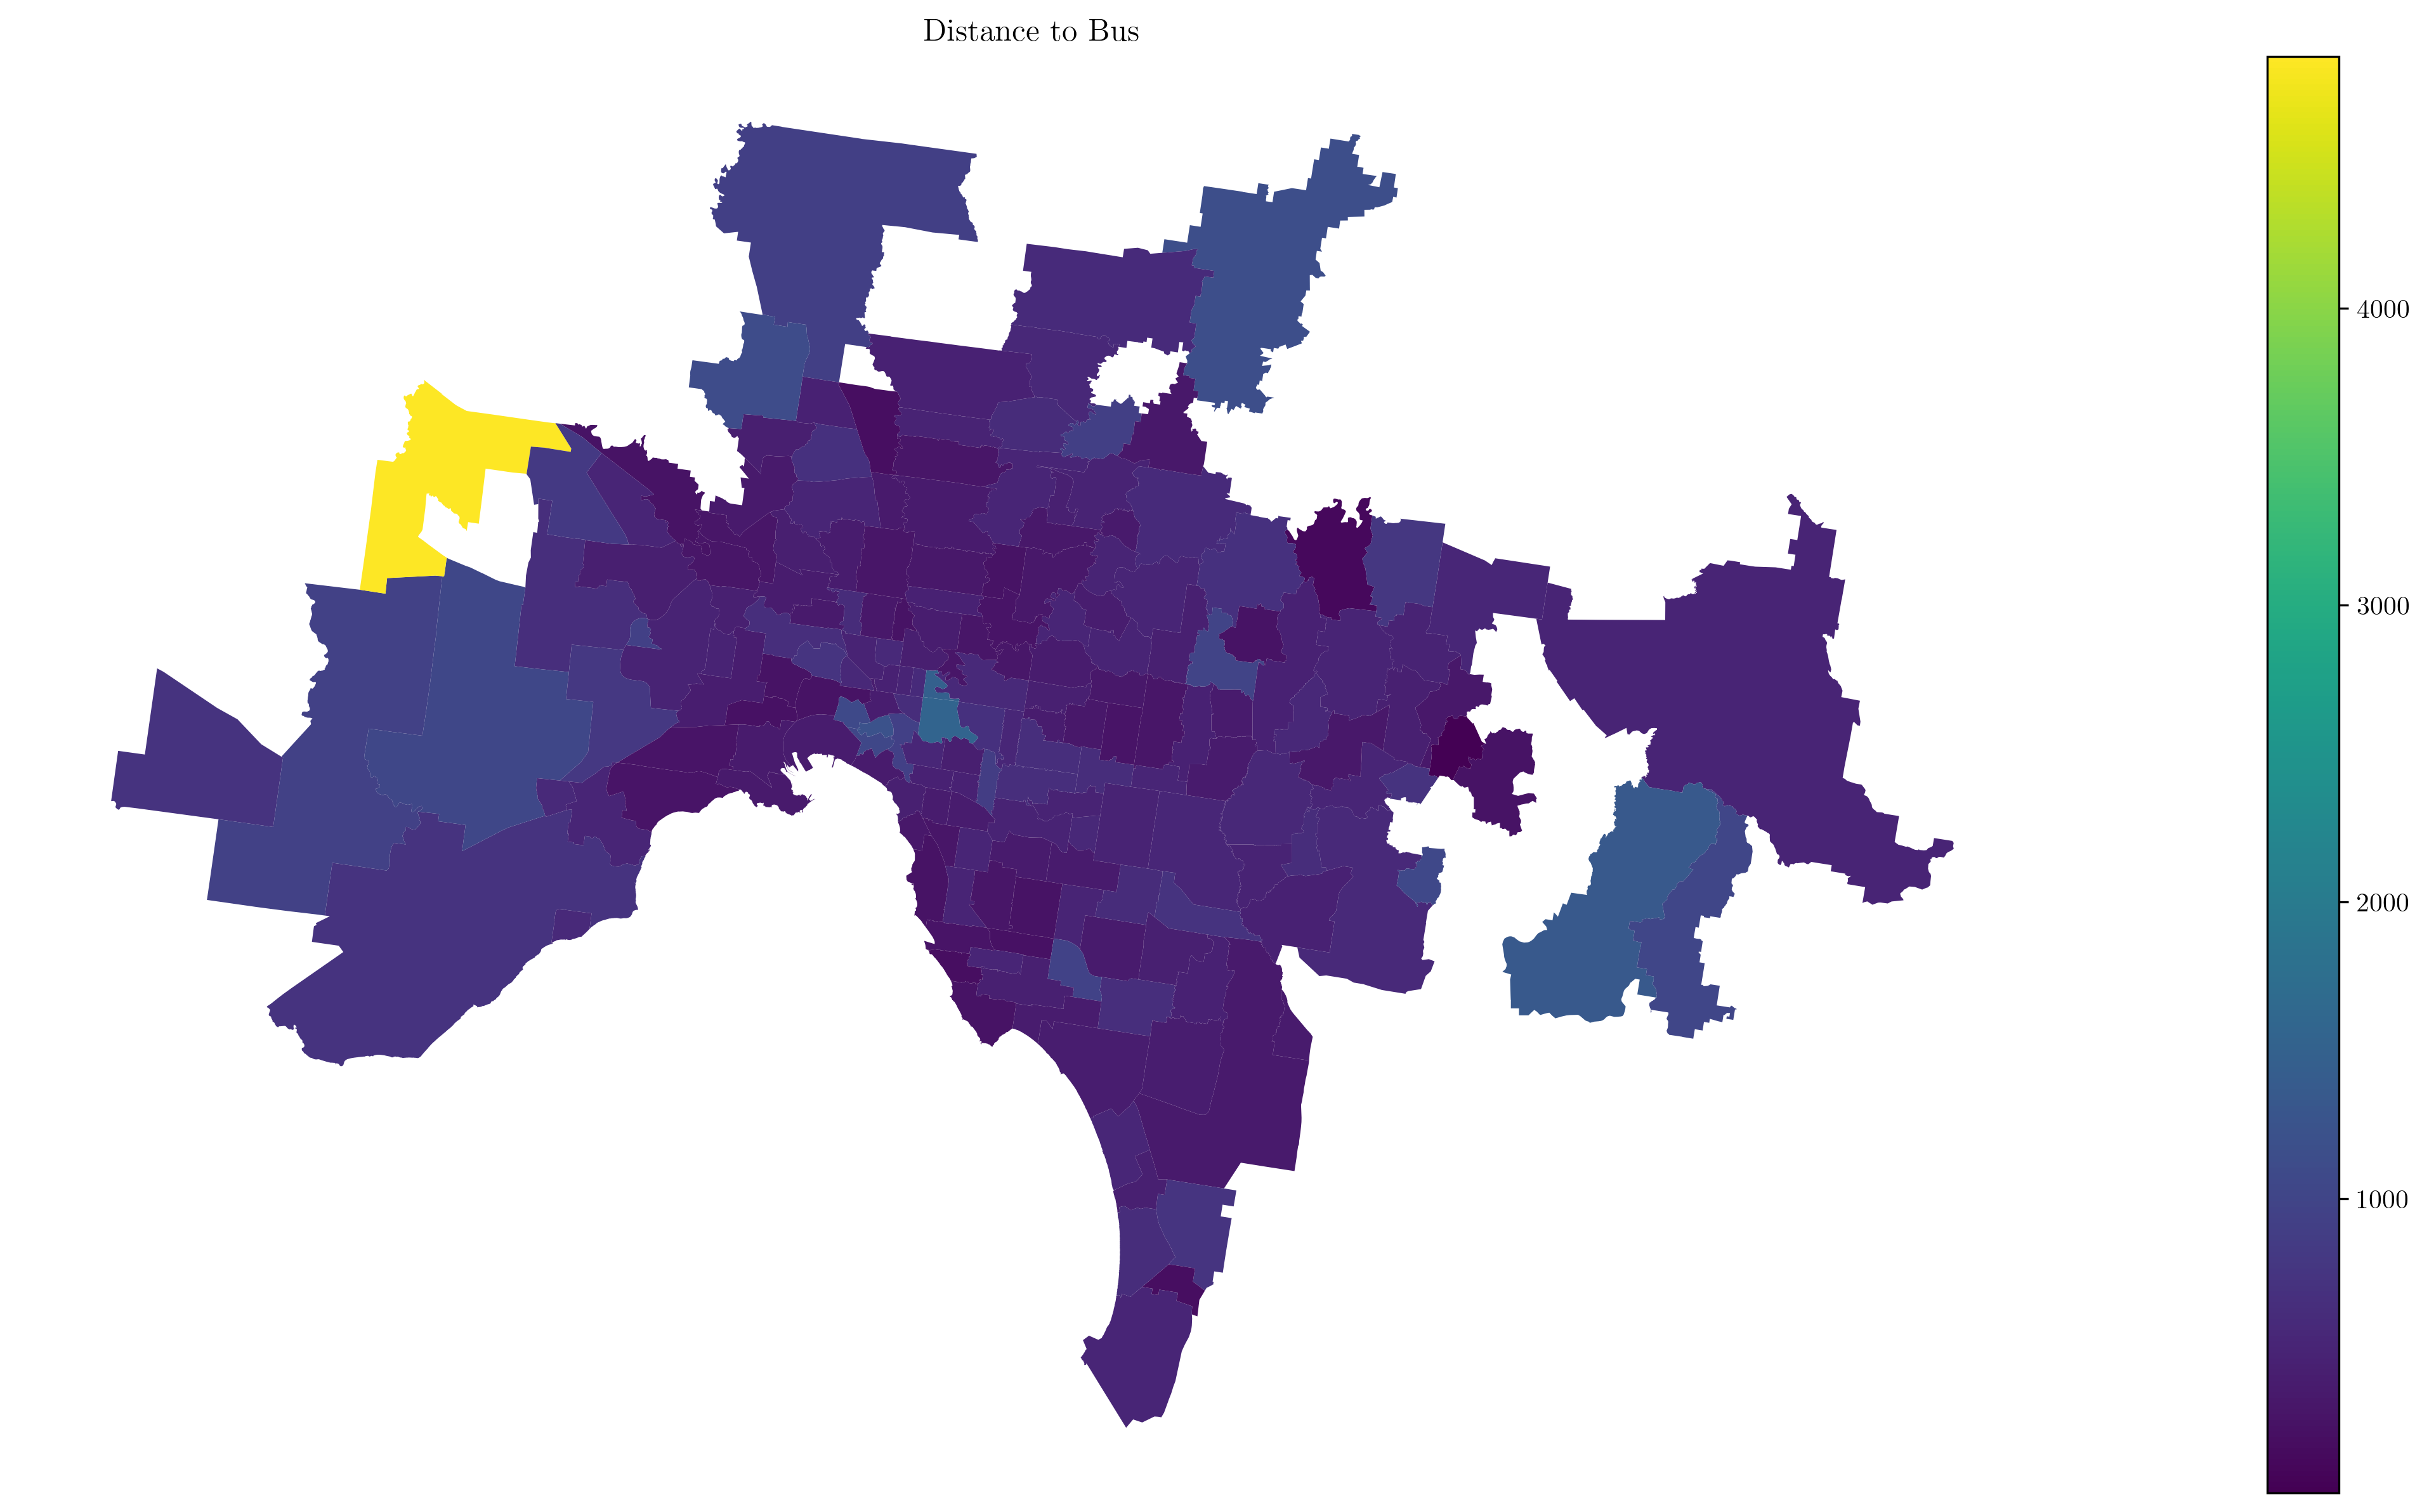

In [13]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("closest_bus_distance", legend=True, ax=ax)
plt.title('Distance to Bus')
ax.set_axis_off()

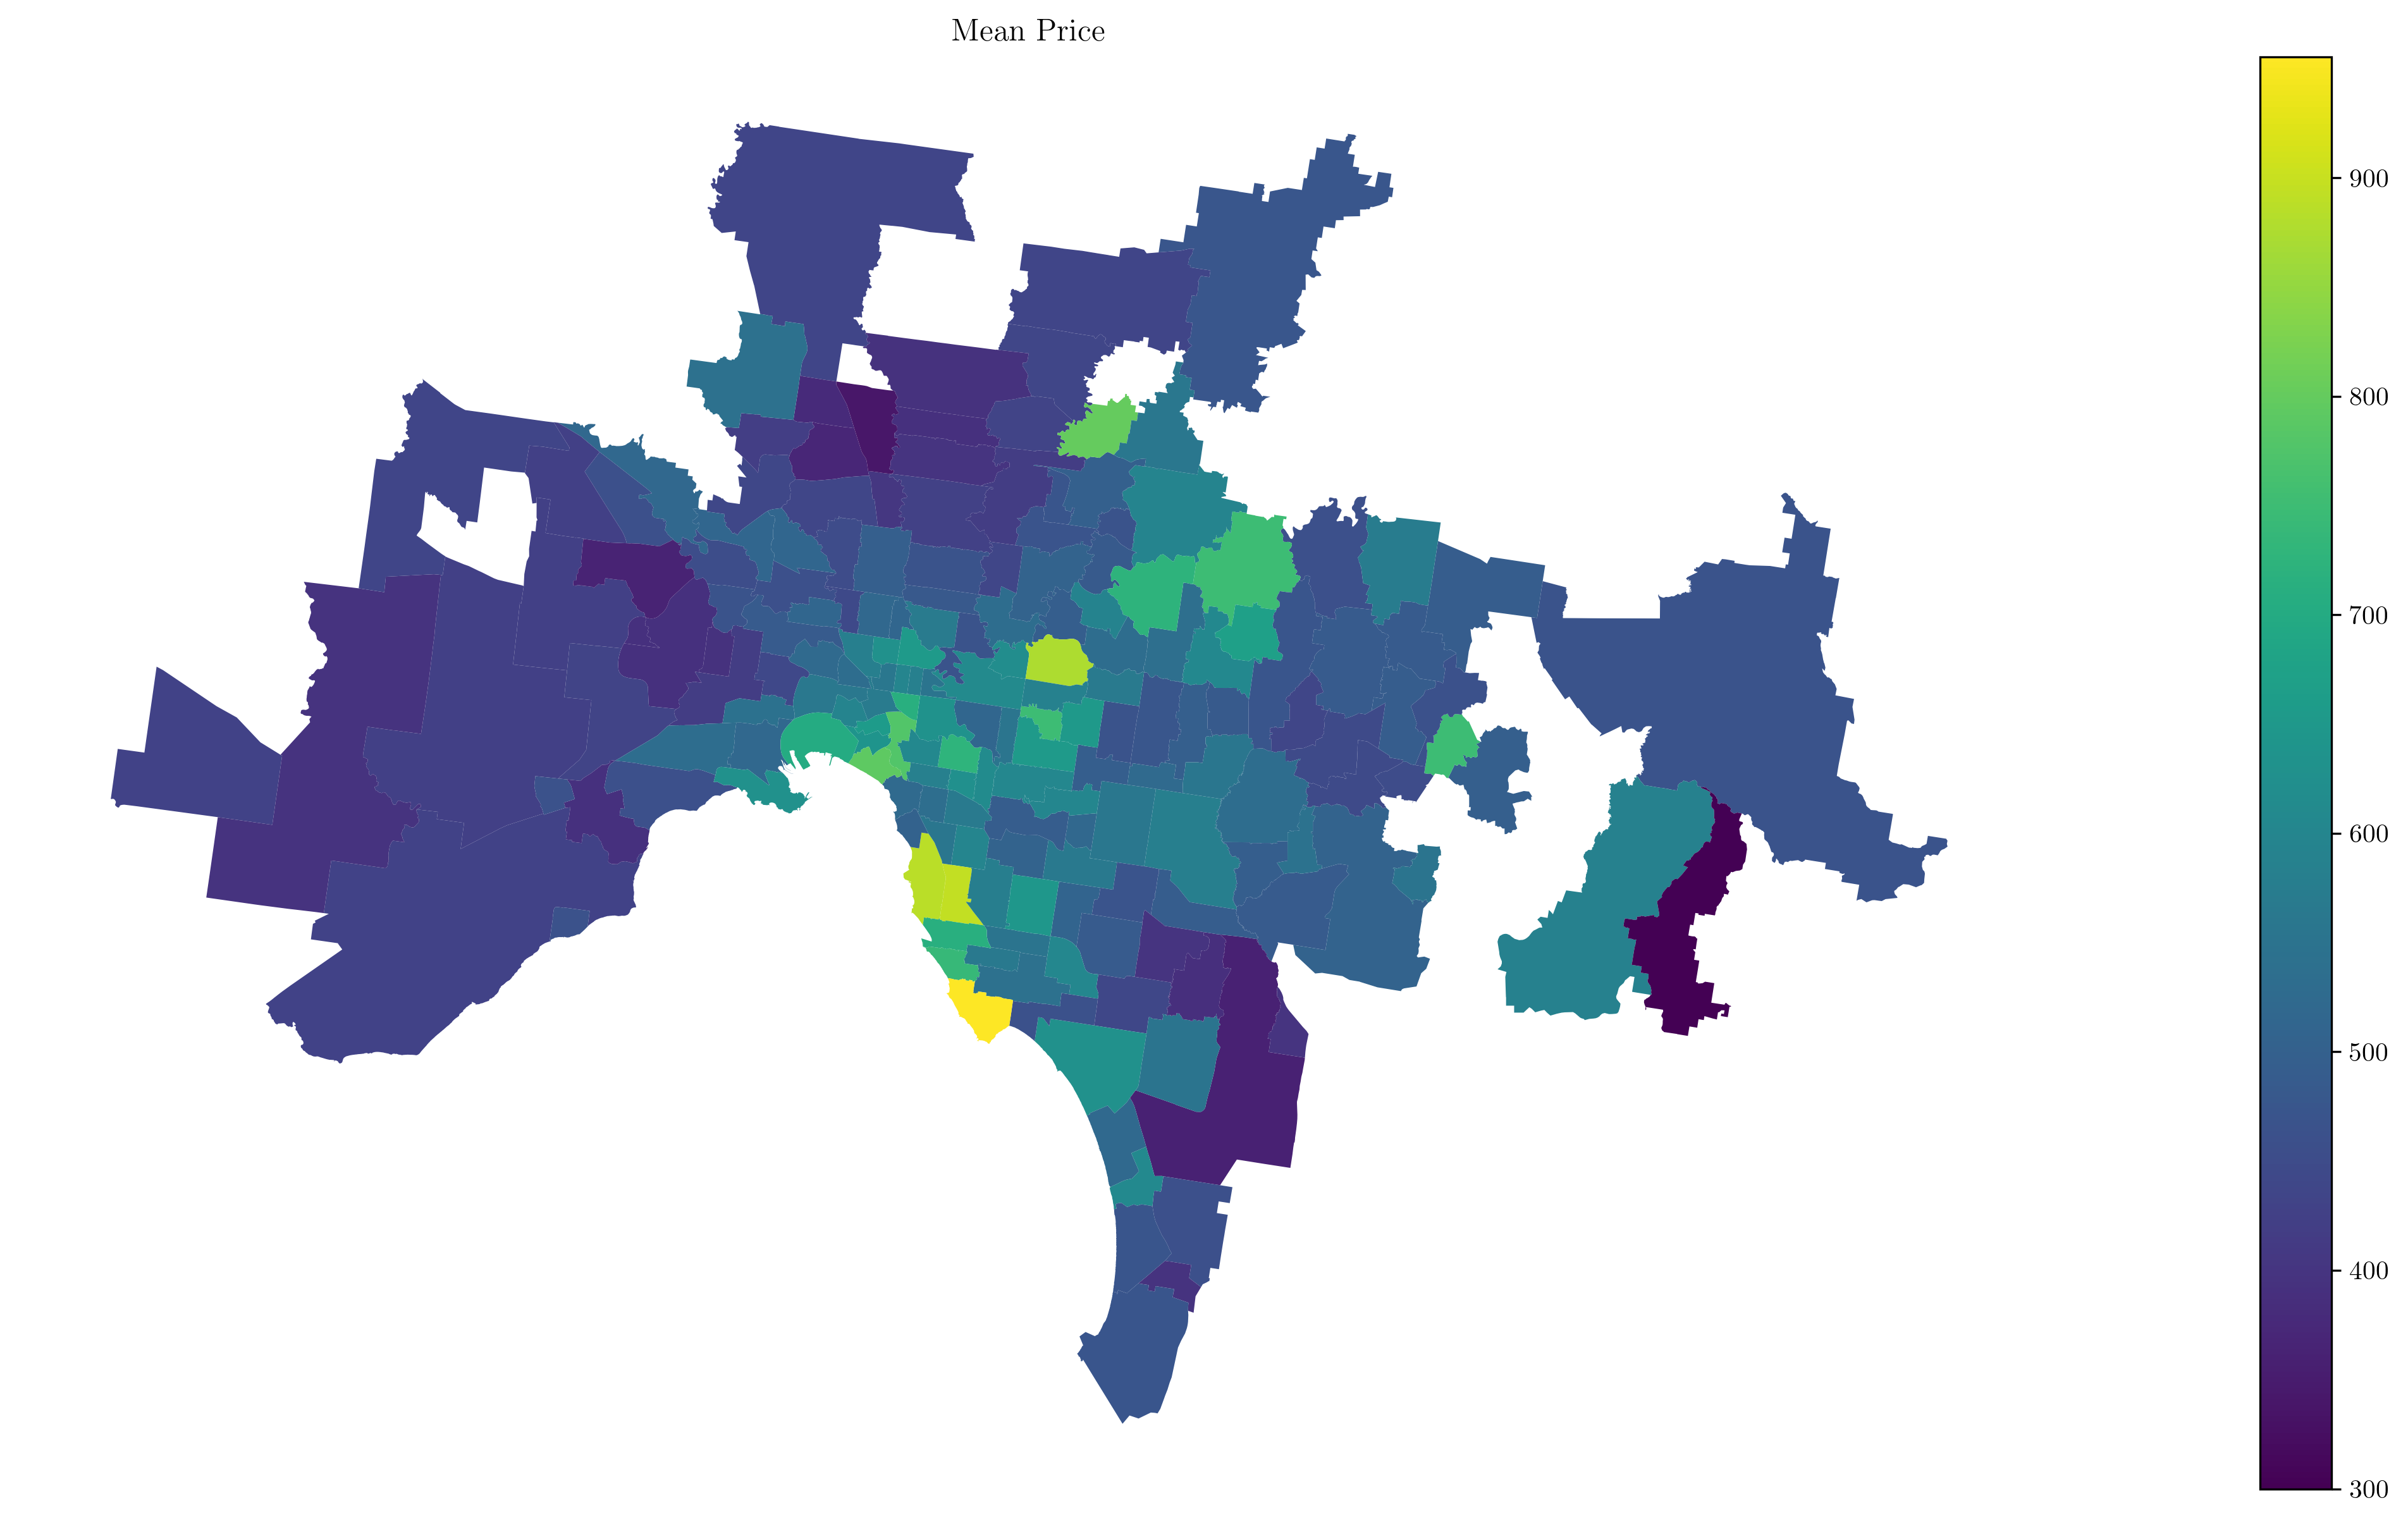

In [14]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("price", legend=True, ax=ax)
plt.title('Mean Price')
ax.set_axis_off()

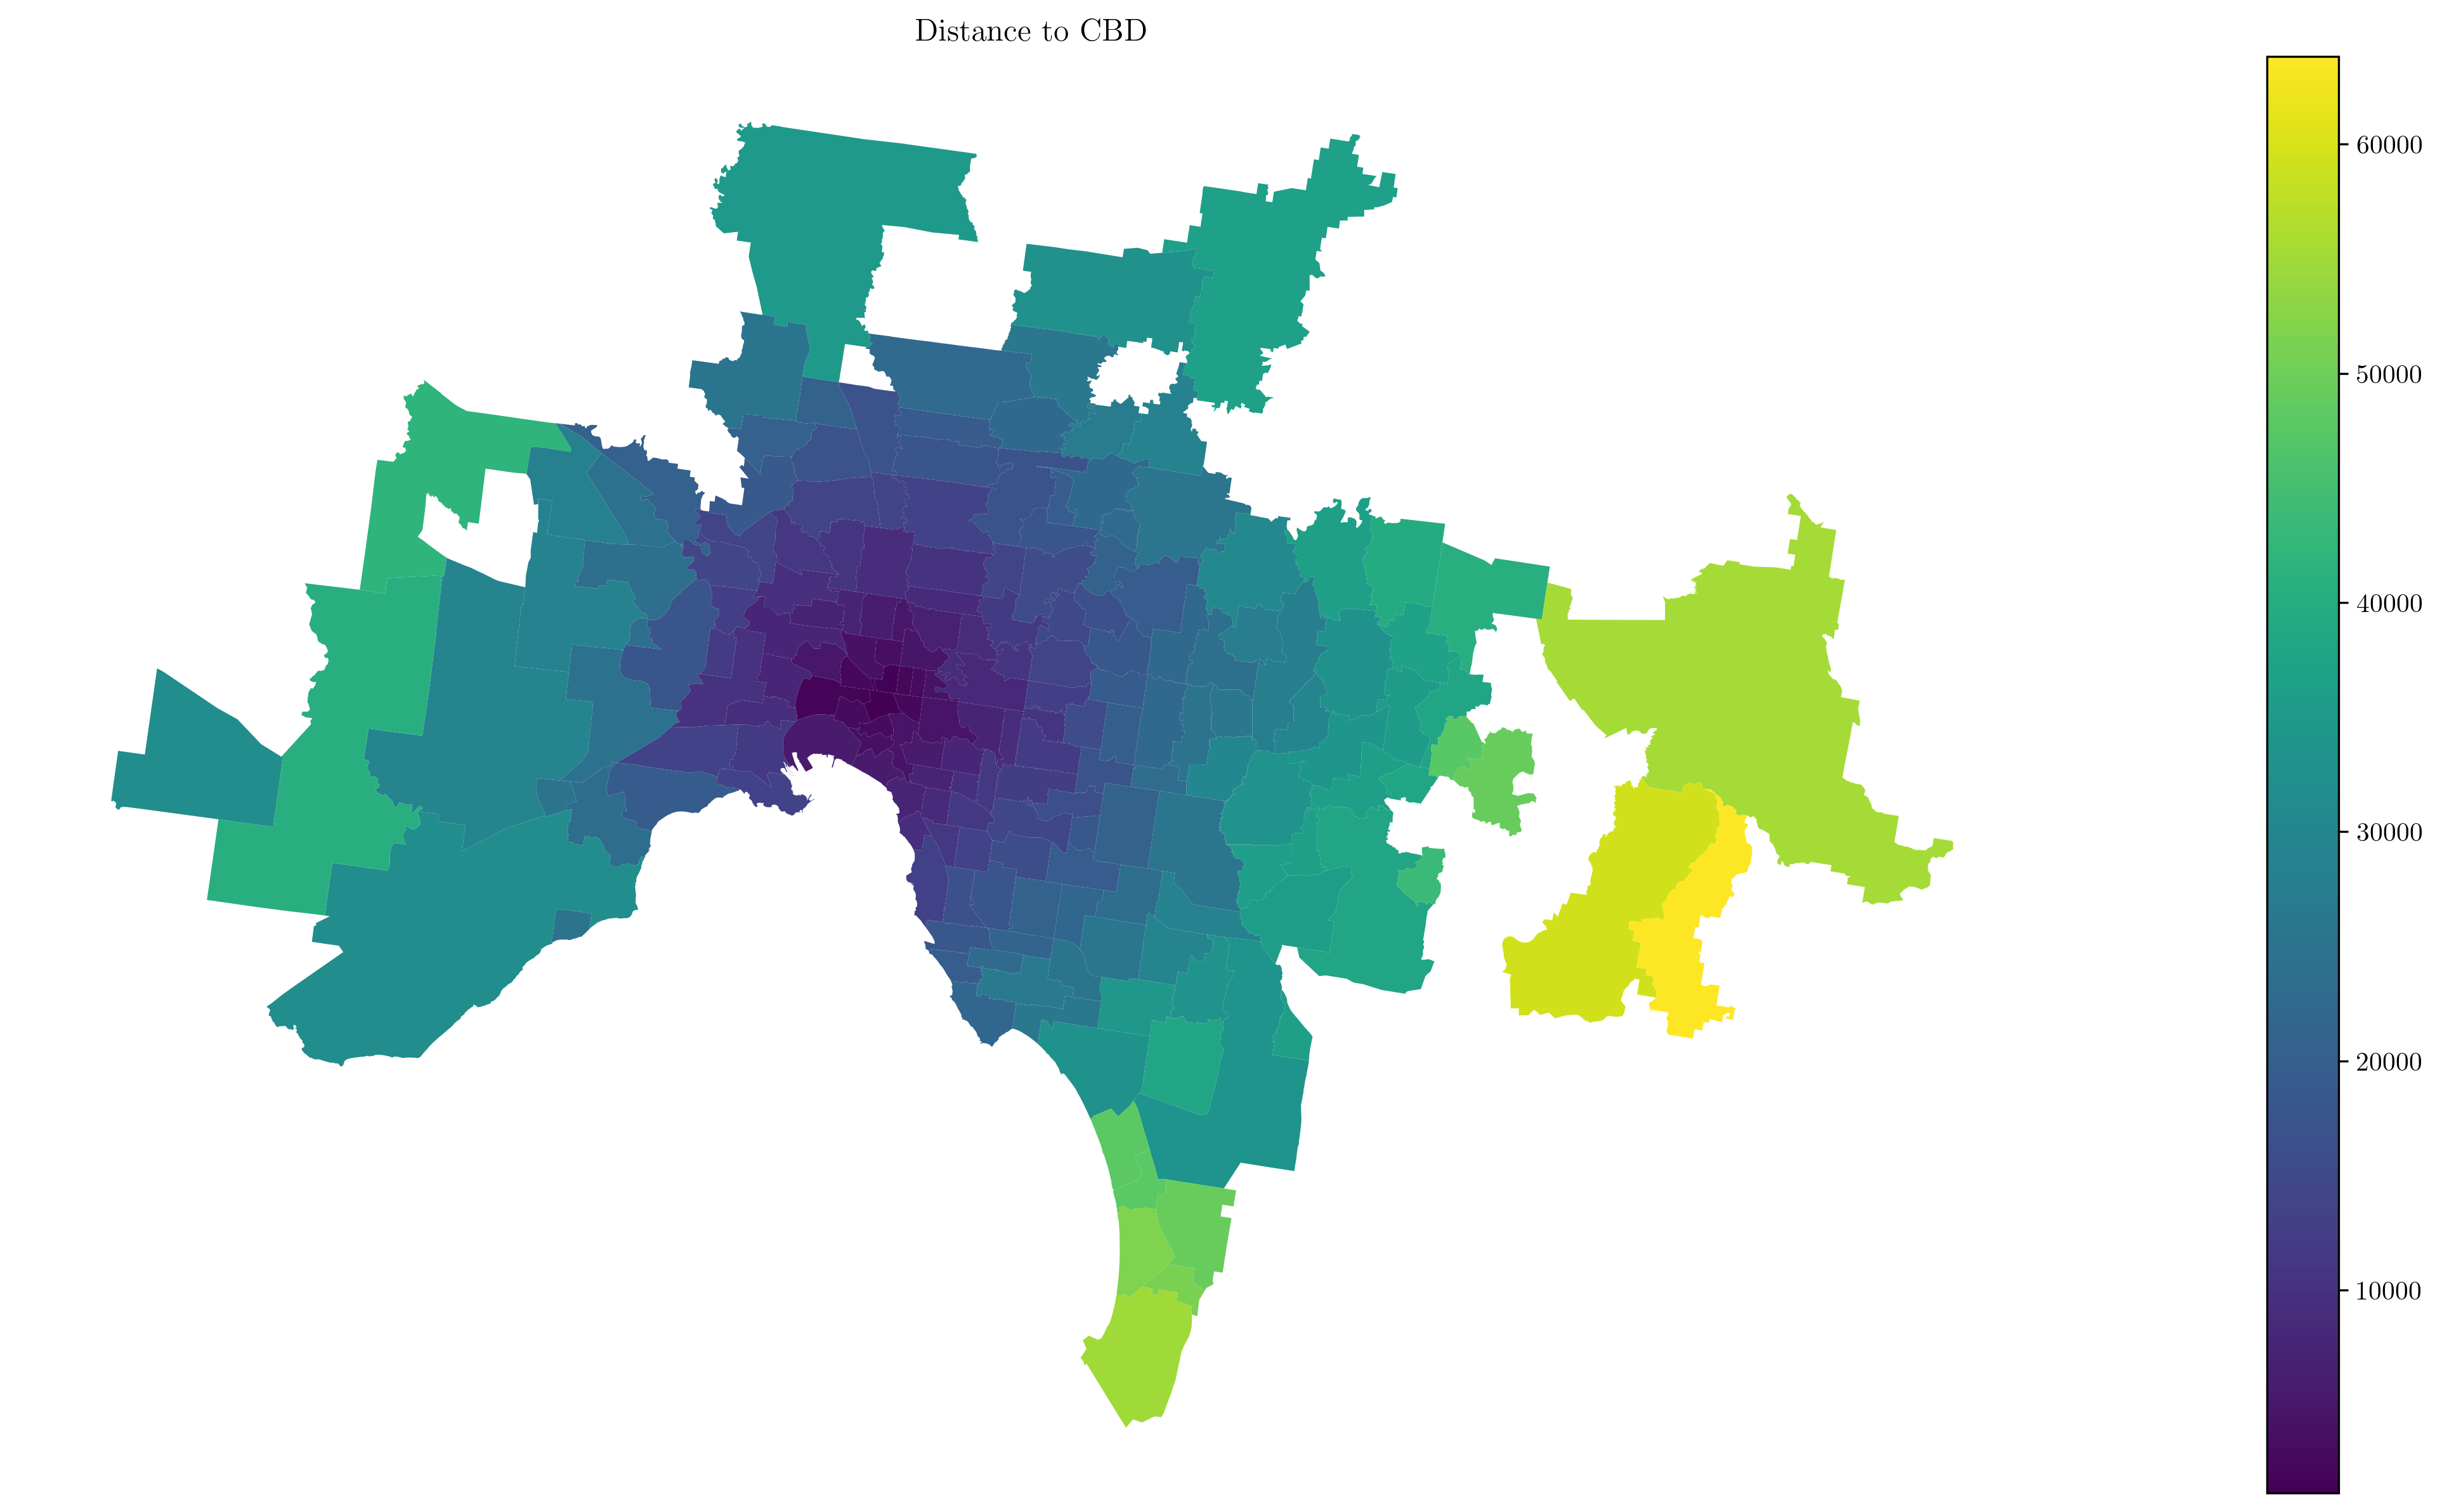

In [15]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("cbd_distance", legend=True, ax=ax)
plt.title('Distance to CBD')
ax.set_axis_off()

In [16]:
plt.savefig('../plots/listing-count.png')

<Figure size 432x288 with 0 Axes>

In [17]:
df = pd.read_csv('../data/curated/subpopu.csv')
mdf = pd.melt(df, id_vars=['POSTCODE'], var_name='Year', value_name='population', value_vars=['2022', '2025'])
mdf['Population Change'] = mdf.groupby('POSTCODE')['population'].apply(pd.Series.pct_change)
mdf

POSTCODE  Year    population  Population Change
0         3000  2022  45480.951326                NaN
1         3002  2022   3110.926161                NaN
2         3003  2022   8401.061456                NaN
3         3004  2022   7951.095169                NaN
4         3006  2022  23171.492309                NaN
...        ...   ...           ...                ...
1383      3990  2025   1060.507244           0.090287
1384      3991  2025   1985.820064           0.090287
1385      3992  2025   3952.866861           0.090287
1386      3995  2025   8241.683396           0.090286
1387      3996  2025   5041.577835           0.085122

[1388 rows x 4 columns]

In [18]:
mdf = mdf.dropna()

In [19]:
gdf = gpd.read_file('./../data/raw/gda94_victoriagrid/esrishape/whole_of_dataset/victoria/VMADMIN/POSTCODE_POLYGON.shp')
gdf['postcode'] = gdf['POSTCODE'].astype(int)

In [20]:
gdf = gdf.merge(mdf[['POSTCODE', 'Population Change']], left_on='postcode', right_on='POSTCODE', how='inner')

In [21]:
analysed_postcodes = set(pd.read_csv('../data/curated/realestate_with_closest_distance_duration.csv')['postcode'].unique())

In [22]:
gdf = gdf[gdf['postcode'].isin(analysed_postcodes)]

In [23]:
gdf['Population Change_r'] = gdf['Population Change'] - gdf['Population Change'].mean()

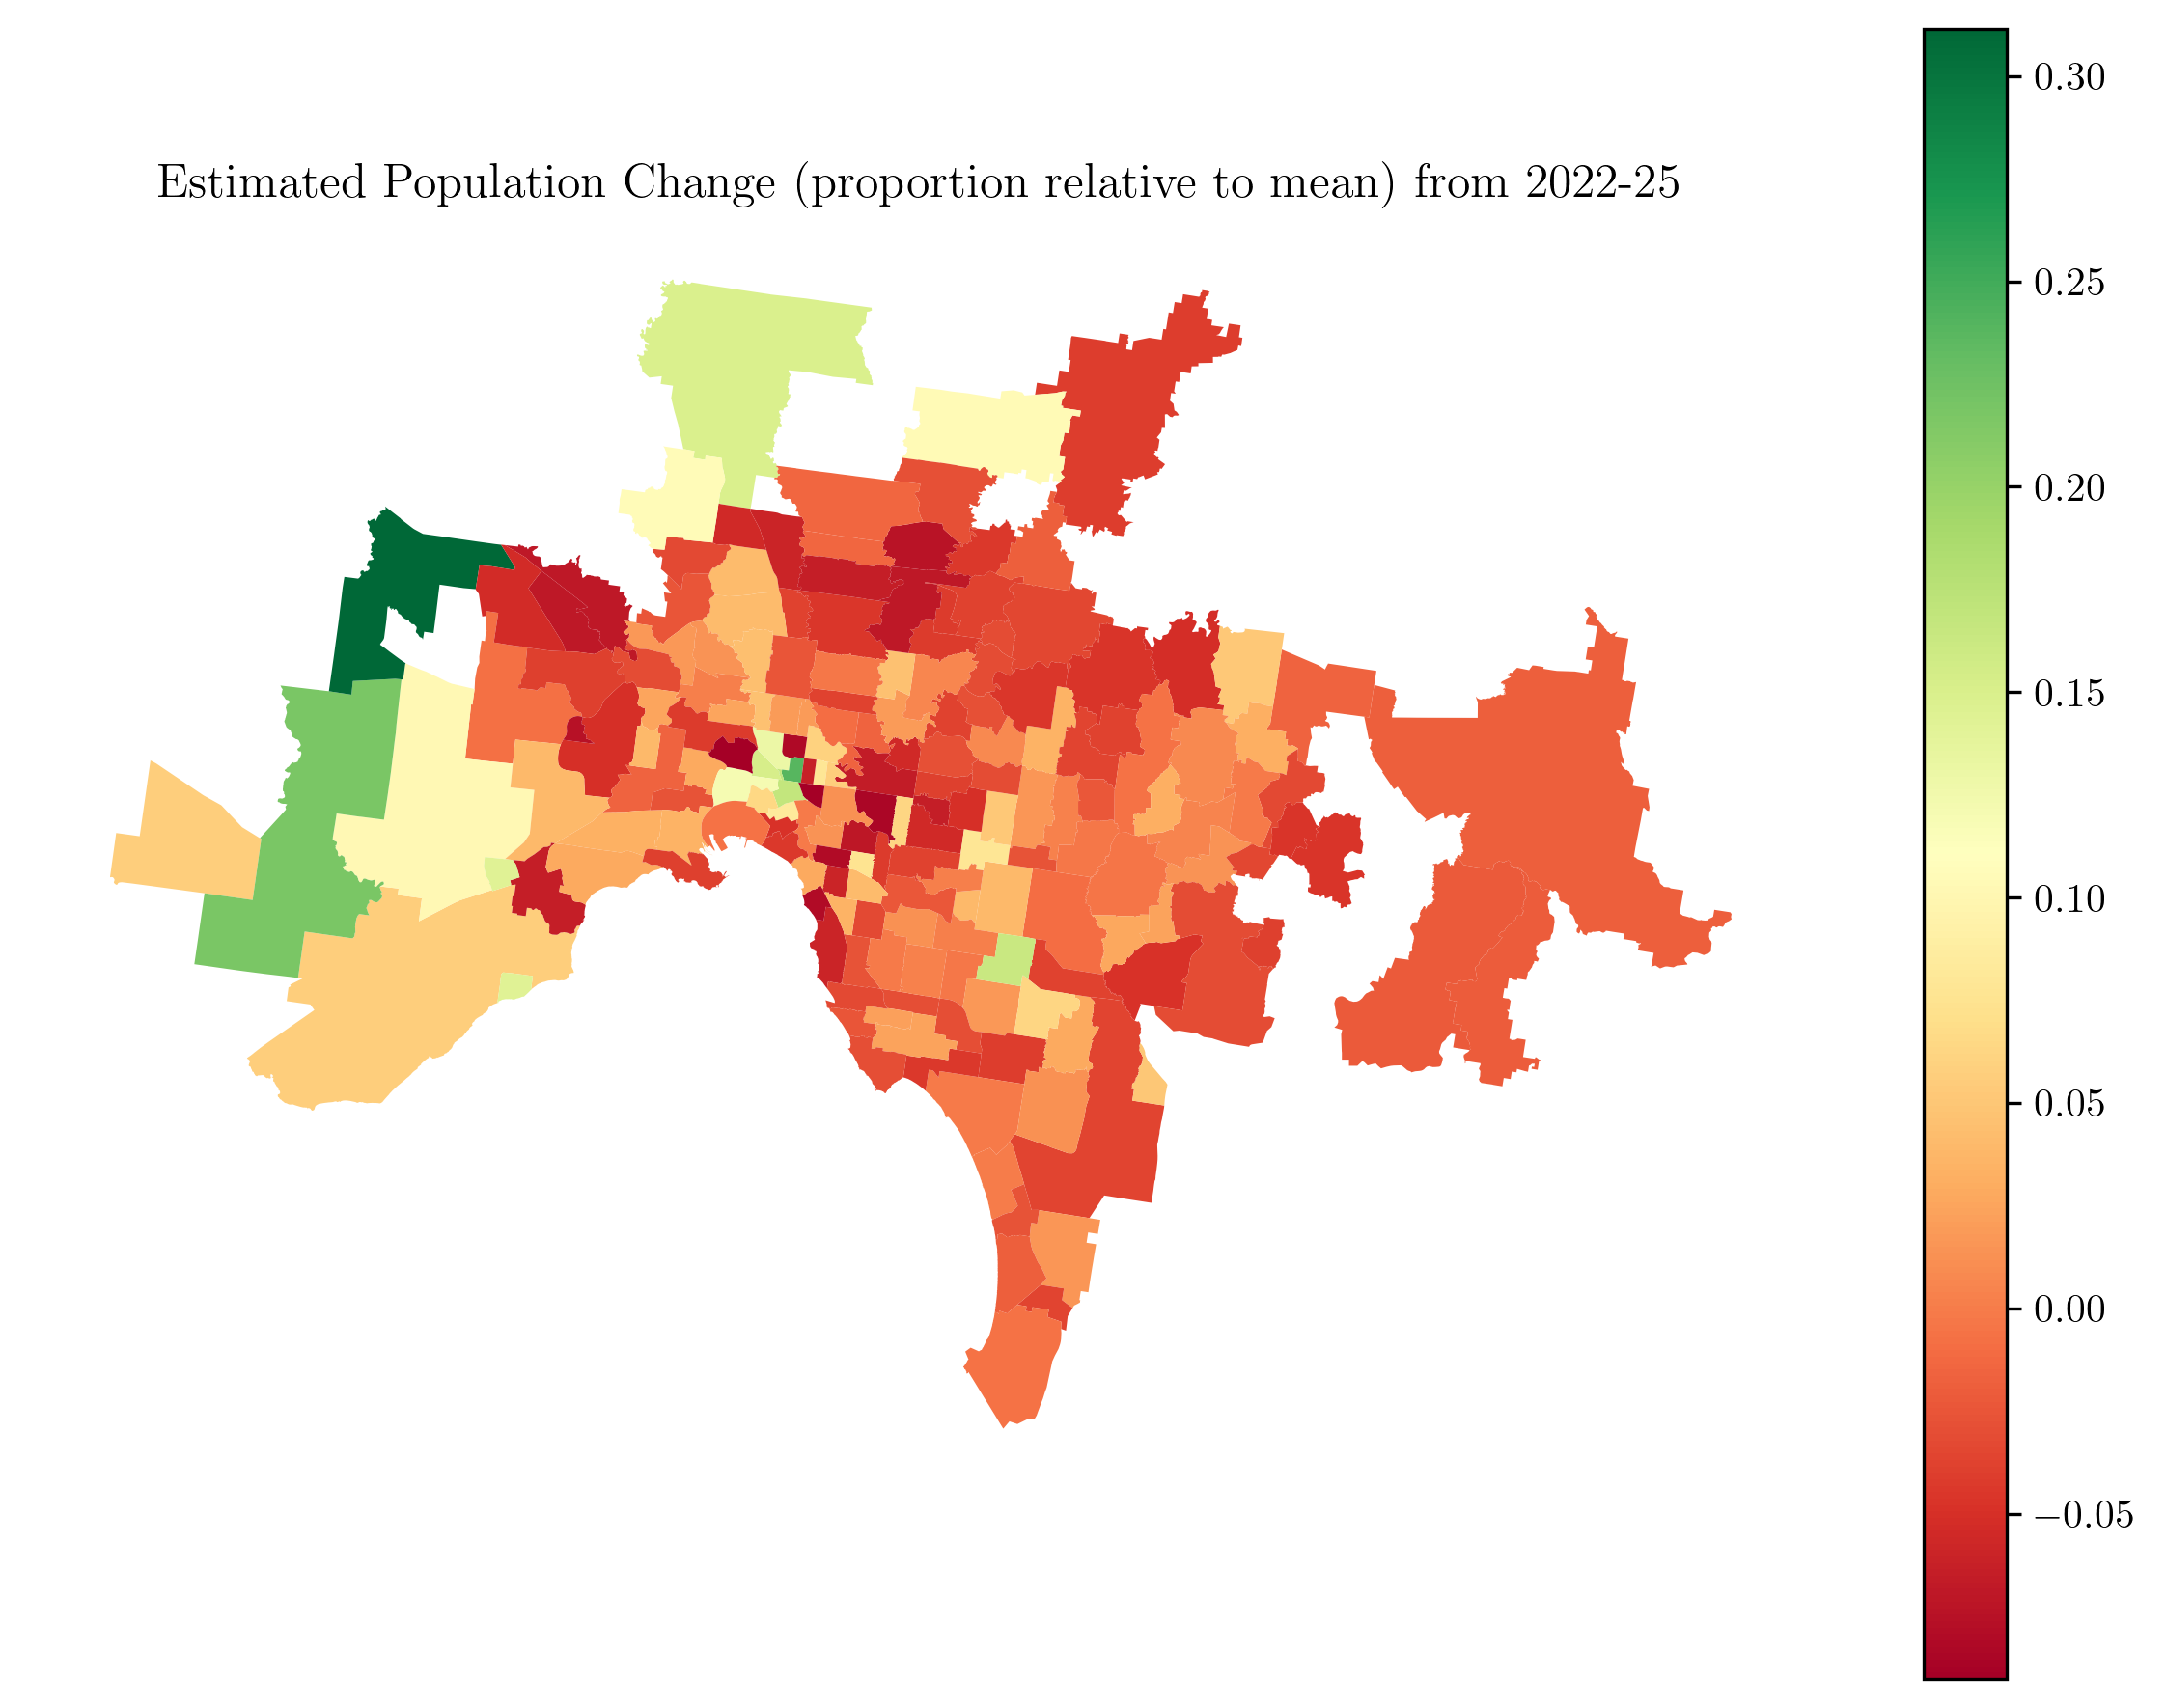

In [24]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
gdf.plot("Population Change_r", legend=True, ax=ax, cmap='RdYlGn')
plt.title('Estimated Population Change (proportion relative to mean) from 2022-25')
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../plots/population-change-map.png')

In [25]:
df = pd.read_csv('../data/curated/subincome.csv')
mdf = pd.melt(df, id_vars=['POSTCODE'], var_name='Year', value_name='income', value_vars=['2022', '2025'])
mdf['income Change'] = mdf.groupby('POSTCODE')['income'].apply(pd.Series.pct_change)
mdf = mdf.dropna()
mdf = mdf[mdf['income Change'] < 1]
mdf

POSTCODE  Year         income  income Change
694       3000  2025   61601.604311       0.027893
695       3002  2025  182081.604156       0.199997
696       3003  2025  132091.725185       0.129600
697       3004  2025  130288.734185       0.119810
698       3006  2025   81982.019449       0.029923
...        ...   ...            ...            ...
1383      3990  2025   62340.958316       0.142384
1384      3991  2025   62313.065693       0.142384
1385      3992  2025   62337.260110       0.142384
1386      3995  2025   62165.586604       0.142383
1387      3996  2025   61097.981041       0.131752

[693 rows x 4 columns]

In [26]:
mdf['income Change_r'] = mdf['income Change'] - mdf['income Change'].mean()

In [27]:
gdf = gdf.merge(mdf[['POSTCODE', 'income Change_r']], left_on='postcode', right_on='POSTCODE')

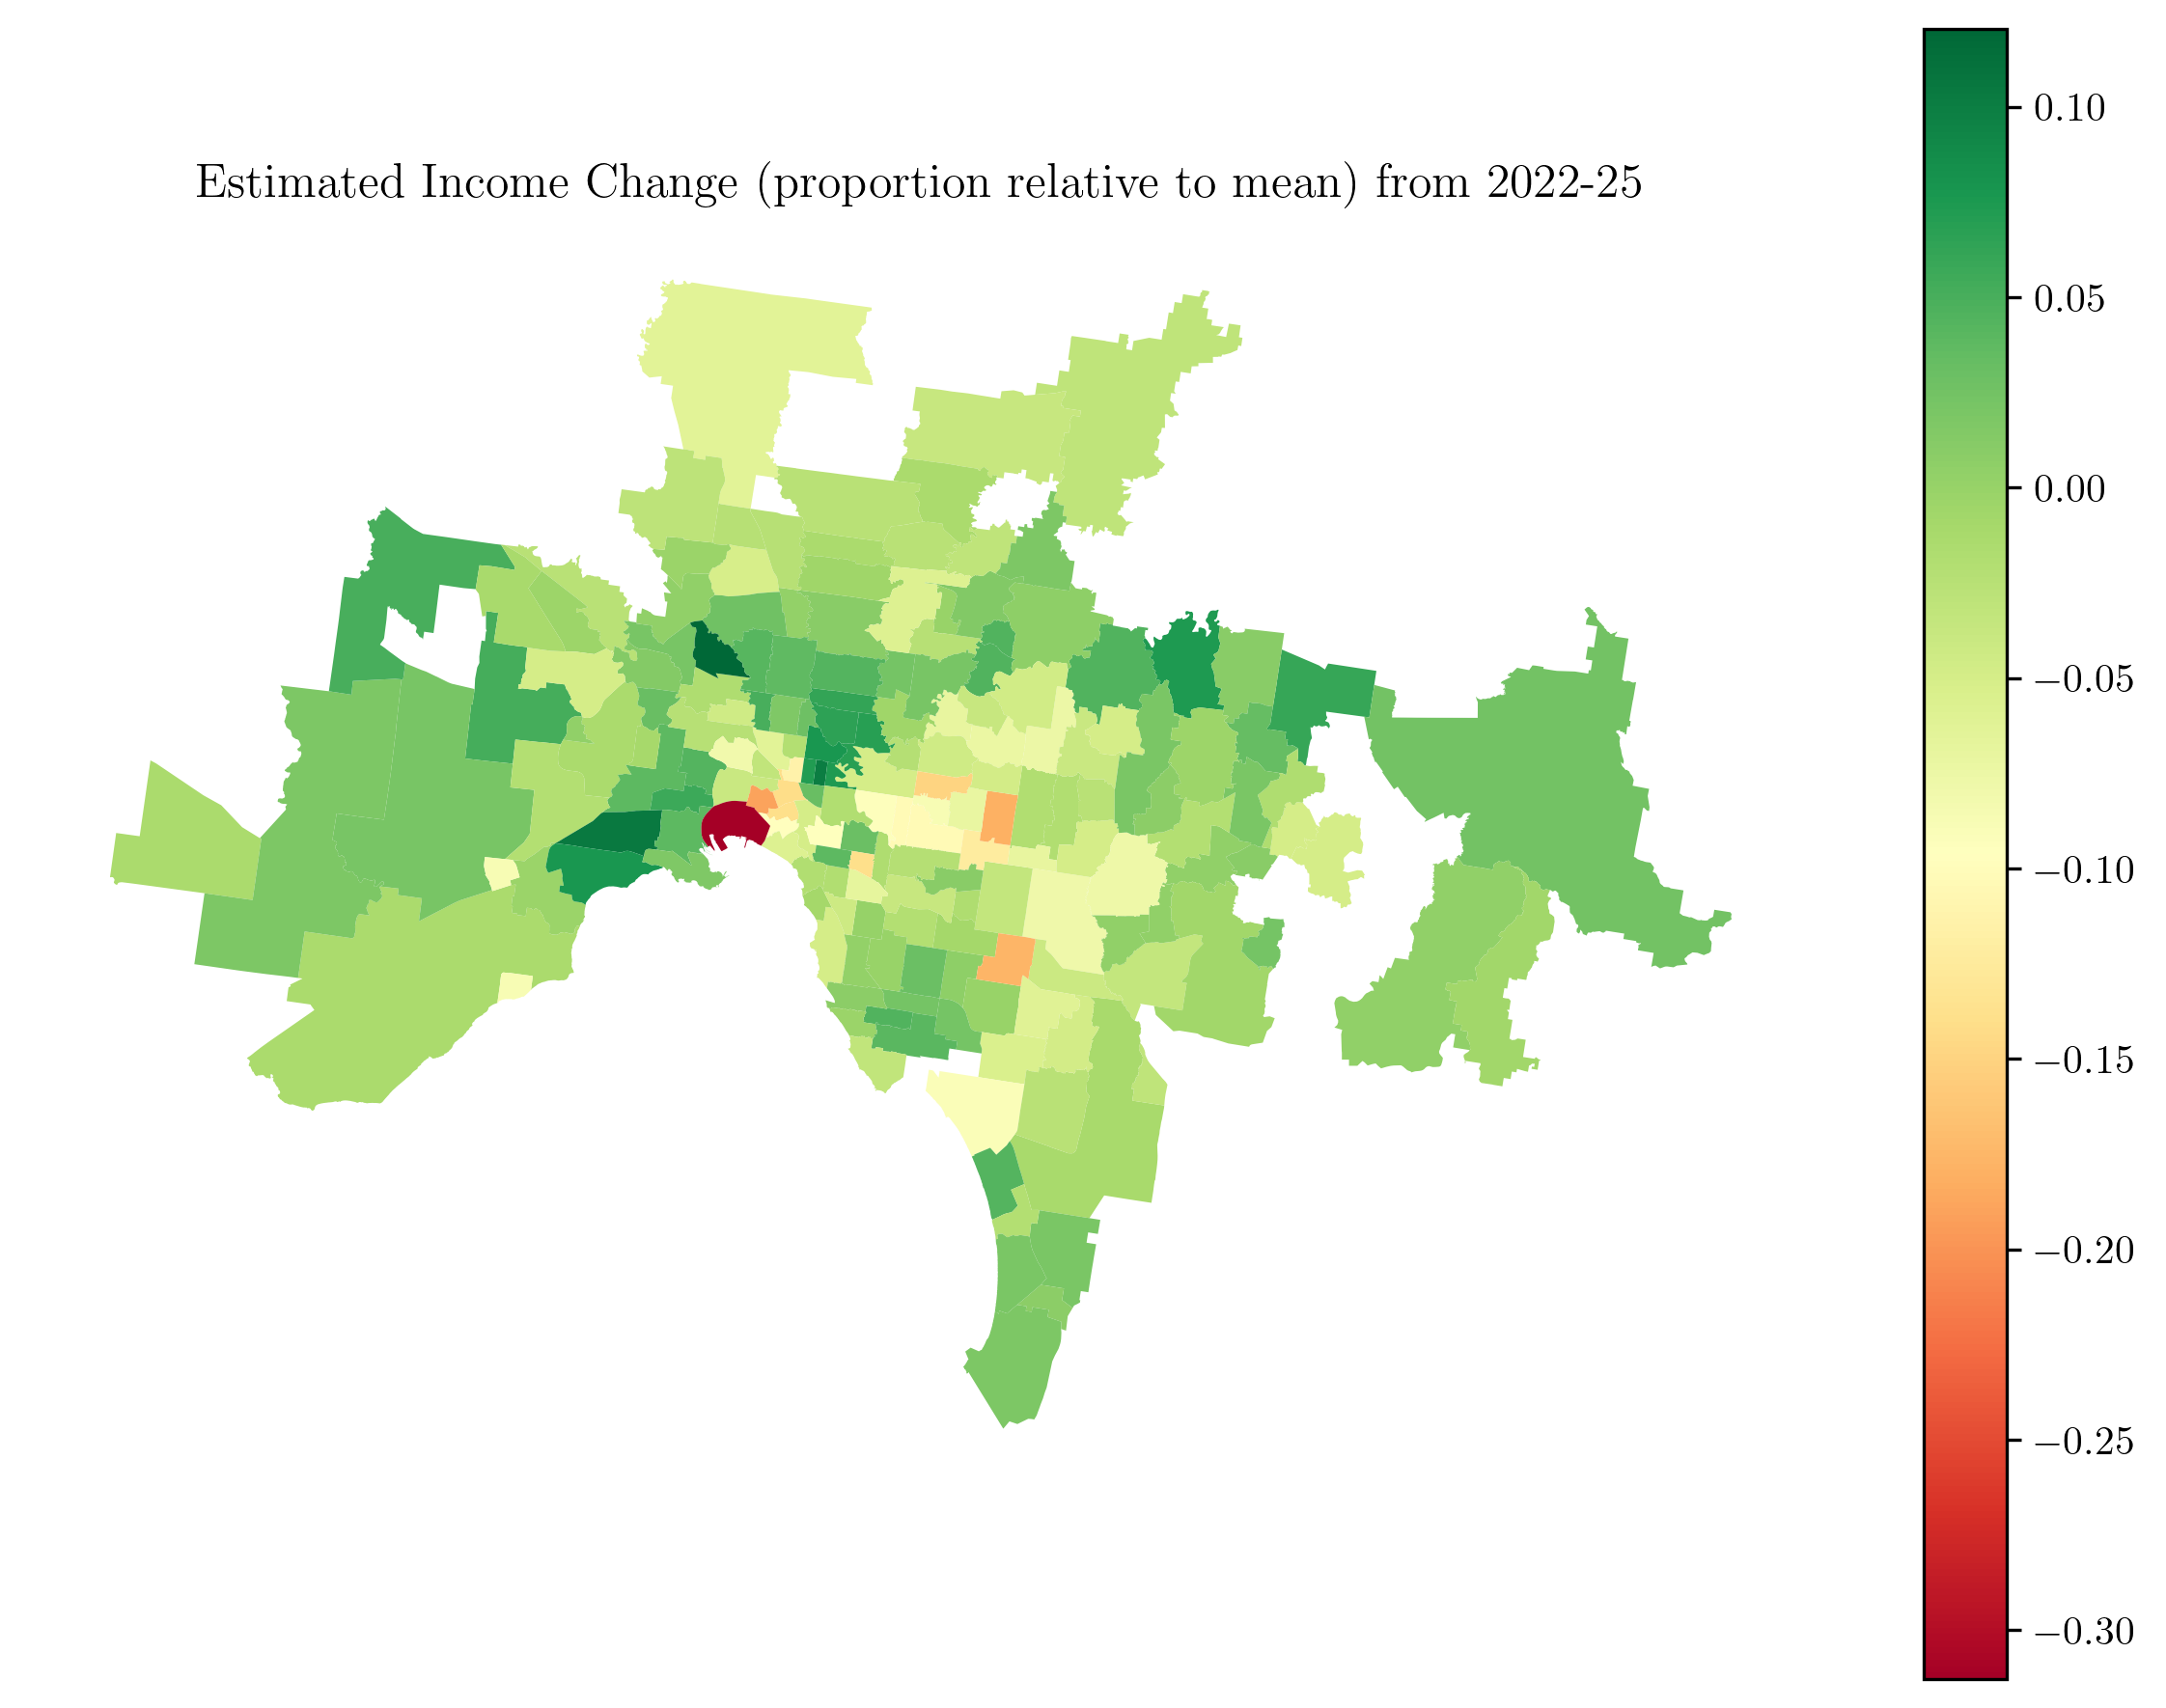

In [28]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
gdf.plot("income Change_r", legend=True, ax=ax, cmap='RdYlGn')
plt.title('Estimated Income Change (proportion relative to mean) from 2022-25')
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../plots/income-change-map.png')

In [29]:
df = pd.read_csv('../data/curated/2025estimates.csv')

In [30]:
df['Relative_Median_Price_Change'] = df['Median_Price_Change'] - df['Median_Price_Change'].mean()

In [31]:
df

Median_Price_Change          suburb  postcode  Median_Price  \
0               0.116478      Abbotsford      3067    547.790376   
1               0.017381     Albert Park      3206    563.312525   
2               0.087206      Alphington      3078    465.751106   
3               0.120280          Altona      3018    464.937955   
4               0.061866        Armadale      3143    498.169808   
..                   ...             ...       ...           ...   
141             0.080626  West Footscray      3012    424.053829   
142             0.147742  West Melbourne      3003    538.689280   
143             0.043534    Williamstown      3016    534.430694   
144             0.041192         Windsor      3181    445.134172   
145             0.065577      Yarraville      3013    515.077899   

     Relative_Median_Price_Change  
0                        0.049381  
1                       -0.049717  
2                        0.020109  
3                        0.053182  
4                       -0.005232  
..                            ...  
141                      0.013528  
142                      0.080645  
143                     -0.023564  
144                     -0.025906  
145                     -0.001520  

[146 rows x 5 columns]

In [32]:
gdf = gdf.merge(df[['postcode', 'Relative_Median_Price_Change']], on='postcode')

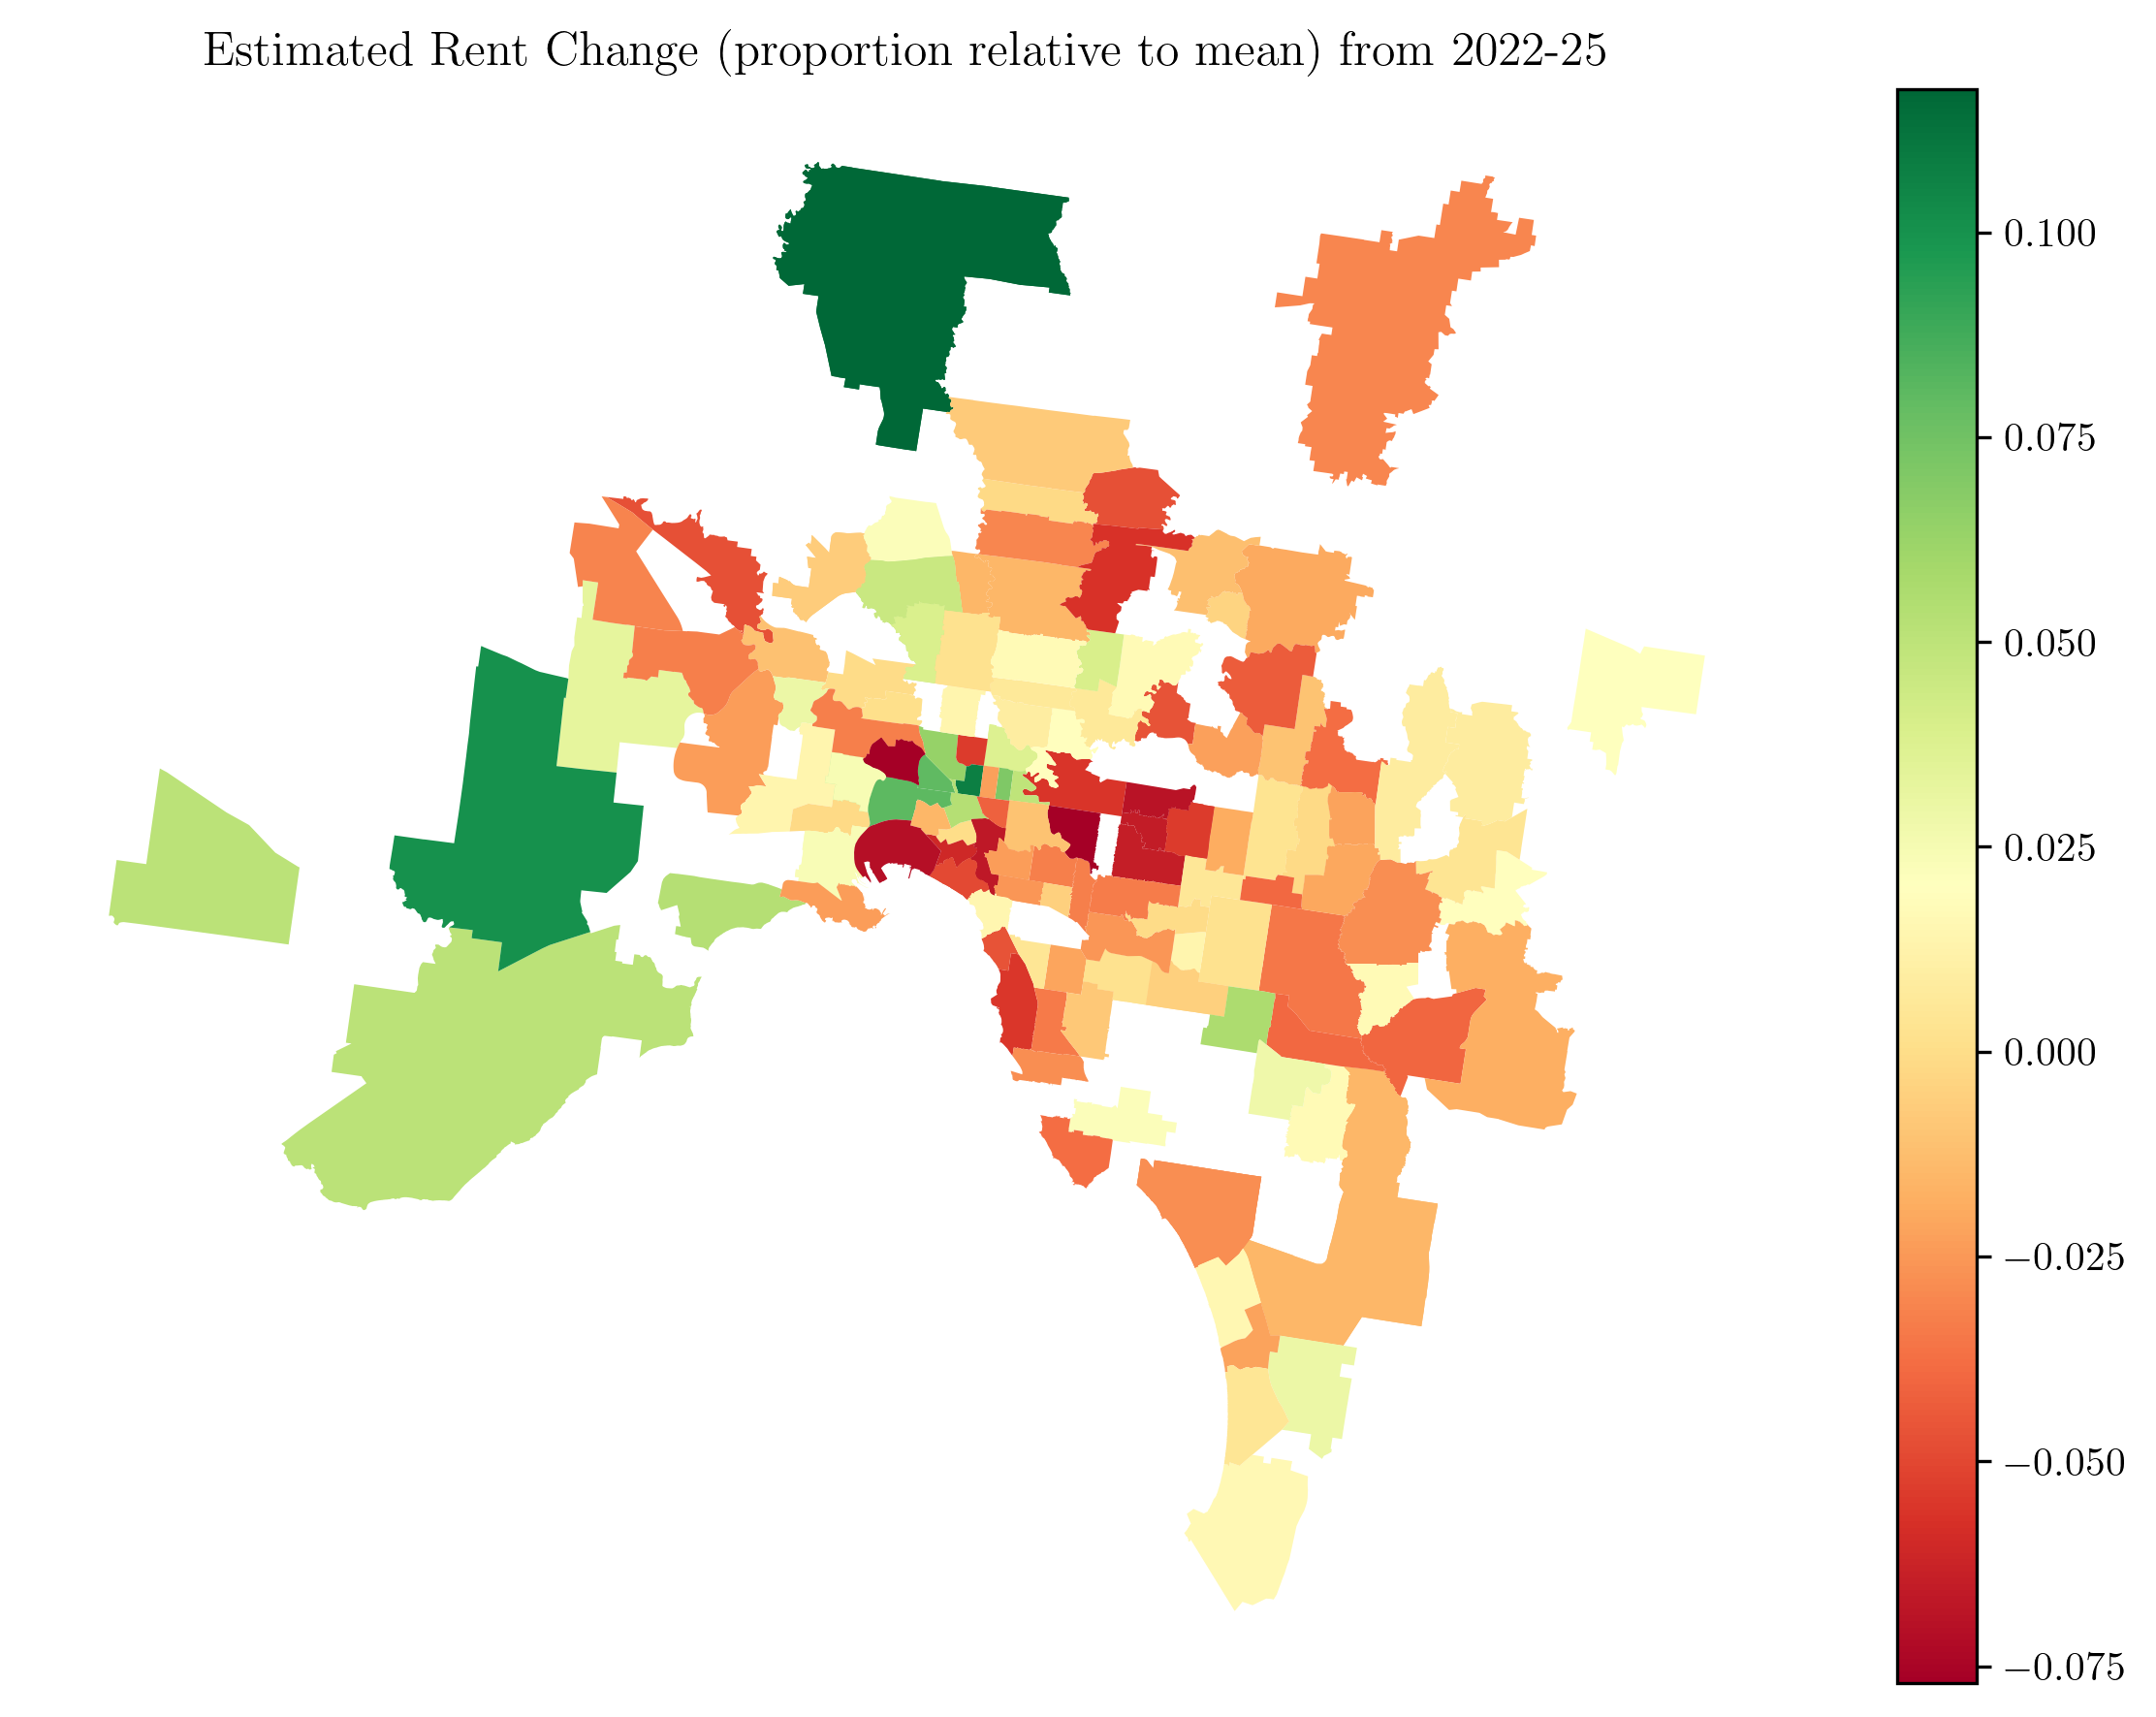

In [33]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
gdf.plot("Relative_Median_Price_Change", legend=True, ax=ax, cmap='RdYlGn')
plt.title('Estimated Rent Change (proportion relative to mean) from 2022-25')
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../plots/rent-change-map.png')